In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import netCDF4
import os
from tqdm import tqdm, trange
import itertools

import cartopy.crs as ccrs

import matplotlib.pyplot as graph
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm

pd.options.mode.chained_assignment = None  # default='warn'


In [12]:
df = xr.open_dataset('/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/isimip_ice/albm_gfdl-esm2m_historical_rcp26_icestart_1901_2099.nc', 
                     decode_times=False)

In [ ]:
import numpy as np
from netCDF4 import Dataset
nc = Dataset('F:\\Research\\Data\\World wide monthly rainfall data\\precip.mon.total.2.5x2.5.v6.nc','r')
for i in nc.variables:
print(i, nc.variables[i].units, nc.variables[i].shape)
d = np.array(nc.variables['precip'], dtype=type(nc.variables))
print(d[:,23.75,91.25])

In [11]:
nc = netCDF4.Dataset('/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/isimip_ice/albm_gfdl-esm2m_historical_rcp26_icestart_1901_2099.nc') 
nc      

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/cdi)
    source: Arctic Lake Biogeochemistry Model v2.0
    institution: Pacific Northwest National Laboratory
    Conventions: CF-1.6
    comment: Data prepared for ISIMIP2b
    username: ztan
    contact: Zeli Tan (zeli.tan@pnnl.gov)
    reference: See https://www.isimip.org/impactmodels/details/232/
    isimip_round: ISIMIP2b
    isimip_upload_date: 2020-03-22 04:29:10
    isimip_upload_version: 1
    isimip_qc_version: 1
    isimip_test_suite_pass_date: 2020.03.23
    CDO: Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/cdo)
    dimensions(sizes): time(199), lon(720), lat(120)
    variables(dimensions): float32 time(time), float32 lon(lon), float32 lat(lat), float32 icestart(time,lat,lon)
    groups: 

In [7]:

for i in nc.variables:
    print(i, nc.variables[i].units, nc.variables[i].shape)

time years since 1661-1-1 00:00:00 (199,)
lon degrees_east (720,)
lat degrees_north (120,)
icestart days (199, 120, 720)


In [25]:
time_var = nc.variables['time']
dtime = netCDF4.num2date(time_var[:], time_var.units)

ValueError: unsupported time units

In [20]:
time = np.array(nc.variables['time'].units[12:16])
time

array('1661', dtype='<U4')

In [37]:
path = '/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/'

for file in tqdm(os.listdir(f'{path}isimip_ice/')):
    file_name = file.split('.nc')[0]
    ds = xr.open_dataset(f'{path}isimip_ice/{file}', decode_times=False)
    df = ds.to_dataframe()
    df.dropna(inplace=True)
    df.reset_index(inplace=True)
    df['years'] = 1901 -240 + df['time']
    df.to_csv(f'{path}Csv_files_no_nan/{file_name}.csv', index=False)

100%|██████████| 93/93 [24:51<00:00, 16.03s/it]


# Get icestart and iceend, and different rcp into lists

In [3]:
path = '/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/'

iceend_files = [file for file in os.listdir(f'{path}Csv_files_no_nan/') if 'iceend' in file]
rcp_26_iceend_files = [file for file in iceend_files if 'rcp26' in file]
rcp_60_iceend_files = [file for file in iceend_files if 'rcp60' in file]
rcp_85_iceend_files = [file for file in iceend_files if 'rcp85' in file]

iceend = []
for file in tqdm(iceend_files):
    rcp = file.split('_rcp')[1].split('_')[0]
    model = file.split('_historical')[0]
    df = pd.read_csv(f'{path}Csv_files_no_nan/{file}')
    df['rcp'] = rcp
    df['model'] = model
#     df = df[['years', 'iceend', 'rcp', 'model']]
    iceend.append(df)

100%|██████████| 46/46 [01:20<00:00,  1.74s/it]


In [4]:
%%time
df_iceend = pd.concat(iceend)
# df_iceend.to_csv('/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/iceend_all.csv', 
#                    index=False)

CPU times: user 28min 43s, sys: 4min 9s, total: 32min 53s
Wall time: 39min 1s


In [5]:
display(df_iceend.head())

lat    lon   time  iceend   years rcp            model
0  83.25 -75.25  240.0   363.0  1901.0  26  albm_gfdl-esm2m
1  83.25 -75.25  241.0   363.0  1902.0  26  albm_gfdl-esm2m
2  83.25 -75.25  242.0   363.0  1903.0  26  albm_gfdl-esm2m
3  83.25 -75.25  243.0   364.0  1904.0  26  albm_gfdl-esm2m
4  83.25 -75.25  244.0   362.0  1905.0  26  albm_gfdl-esm2m

In [2]:
%%time
df_iceend = pd.read_csv("/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/iceend_all.csv")
display(df_iceend.head())

df_icestart = pd.read_csv("/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/icestart_all.csv")
display(df_icestart.head())

lat    lon   time  iceend   years  rcp            model
0  83.25 -75.25  240.0   363.0  1901.0   26  albm_gfdl-esm2m
1  83.25 -75.25  241.0   363.0  1902.0   26  albm_gfdl-esm2m
2  83.25 -75.25  242.0   363.0  1903.0   26  albm_gfdl-esm2m
3  83.25 -75.25  243.0   364.0  1904.0   26  albm_gfdl-esm2m
4  83.25 -75.25  244.0   362.0  1905.0   26  albm_gfdl-esm2m

lat    lon   time  icestart   years  rcp            model
0  83.25 -75.25  240.0      -1.0  1901.0   26  albm_gfdl-esm2m
1  83.25 -75.25  241.0      -1.0  1902.0   26  albm_gfdl-esm2m
2  83.25 -75.25  242.0      -1.0  1903.0   26  albm_gfdl-esm2m
3  83.25 -75.25  243.0      -1.0  1904.0   26  albm_gfdl-esm2m
4  83.25 -75.25  244.0      -1.0  1905.0   26  albm_gfdl-esm2m

CPU times: user 1min 50s, sys: 1min 43s, total: 3min 34s
Wall time: 3min 42s


In [40]:
for rcp in [26, 60, 85]:
    rcp_df = df_iceend[df_iceend['rcp'] == rcp]
    
    ks_df = []    
    for model in tqdm(itertools.product(rcp_df['model'].unique(), repeat=2)):
        model_1, model_2 = model[0], model[1]
        model_1_df = rcp_df[rcp_df['model'] == model_1]['iceend']
        model_2_df = rcp_df[rcp_df['model'] == model_2]['iceend']
        ks_p = stats.ks_2samp(model_1_df, model_2_df)[1]
        ks_df.append([model_1, model_2, ks_p])
    
    ks_df = pd.DataFrame(ks_df, columns=['model_1', 'model_2', 'ks_p_val'])
    display(ks_df.head())
    ks_df.to_csv(f'/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/Analysis/rcp_{rcp}_iceend_ks_test.csv', 
                 index=False)

256it [22:14,  5.21s/it]


model_1            model_2       ks_p_val
0  albm_gfdl-esm2m    albm_gfdl-esm2m   1.000000e+00
1  albm_gfdl-esm2m    albm_hadgem2-es   0.000000e+00
2  albm_gfdl-esm2m  albm_ipsl-cm5a-lr  2.830220e-127
3  albm_gfdl-esm2m        albm_miroc5  1.053563e-248
4  albm_gfdl-esm2m   clm45_gfdl-esm2m   0.000000e+00

256it [23:36,  5.53s/it]


model_1            model_2       ks_p_val
0  albm_gfdl-esm2m    albm_gfdl-esm2m   1.000000e+00
1  albm_gfdl-esm2m    albm_hadgem2-es   0.000000e+00
2  albm_gfdl-esm2m  albm_ipsl-cm5a-lr   1.575543e-80
3  albm_gfdl-esm2m        albm_miroc5  5.221832e-294
4  albm_gfdl-esm2m   clm45_gfdl-esm2m   0.000000e+00

196it [14:49,  4.54s/it]


model_1            model_2       ks_p_val
0  albm_gfdl-esm2m    albm_gfdl-esm2m   1.000000e+00
1  albm_gfdl-esm2m    albm_hadgem2-es   0.000000e+00
2  albm_gfdl-esm2m  albm_ipsl-cm5a-lr  2.288182e-219
3  albm_gfdl-esm2m        albm_miroc5   0.000000e+00
4  albm_gfdl-esm2m   clm45_gfdl-esm2m   0.000000e+00

In [25]:
stats.ks_2samp(model_df, model_df)[1]

1.0

# Kevin's all dataset

In [19]:
kevin = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/all_lakes_ts_minimal_KB_Aug31.csv')
kevin = kevin[['start_year', 'froze', 'froze_1', 'froze_2', 'froze_3', 'froze_4', 'froze_5', 'froze_6', 'ice_on_1', 
               'ice_off_1', 'ice_on_2', 'ice_off_2', 'ice_on_3', 'ice_off_3', 'ice_on_4', 'ice_off_4', 'ice_on_5', 
               'ice_off_5', 'ice_on_6', 'ice_off_6', 'orig_duration', 'orig_duration_column', 'latitude', 'longitude']]

kevin['lat_long'] = kevin['latitude'].round(1).astype(str) + '_' + kevin['longitude'].round(1).astype(str)
display(kevin.head())

/home/arshad/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (9,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


start_year froze froze_1 froze_2 froze_3 froze_4 froze_5 froze_6  \
0        1443     Y       Y     NaN     NaN     NaN     NaN     NaN   
1        1444     Y       Y     NaN     NaN     NaN     NaN     NaN   
2        1445     Y       Y     NaN     NaN     NaN     NaN     NaN   
3        1446     Y       Y     NaN     NaN     NaN     NaN     NaN   
4        1447     Y       Y     NaN     NaN     NaN     NaN     NaN   

     ice_on_1 ice_off_1  ... ice_off_4 ice_on_5 ice_off_5 ice_on_6 ice_off_6  \
0  1444-01-07       NaN  ...       NaN      NaN       NaN      NaN       NaN   
1  1444-12-23       NaN  ...       NaN      NaN       NaN      NaN       NaN   
2  1445-12-31       NaN  ...       NaN      NaN       NaN      NaN       NaN   
3  1447-01-01       NaN  ...       NaN      NaN       NaN      NaN       NaN   
4  1447-12-30       NaN  ...       NaN      NaN       NaN      NaN       NaN   

  orig_duration orig_duration_column latitude  longitude    lat_long  
0           NaN                 None    36.04     138.08  36.0_138.1  
1           NaN                 None    36.04     138.08  36.0_138.1  
2           NaN                 None    36.04     138.08  36.0_138.1  
3           NaN                 None    36.04     138.08  36.0_138.1  
4           NaN                 None    36.04     138.08  36.0_138.1  

[5 rows x 25 columns]

In [20]:
kevin = kevin[['start_year', 'froze', 'froze_1', 'ice_on_1', 'ice_off_1', 'orig_duration', 'orig_duration_column', 
               'latitude', 'longitude']]

kevin['lat_long'] = kevin['latitude'].round(1).astype(str) + '_' + kevin['longitude'].round(1).astype(str)
kevin = kevin.loc[kevin['start_year'] > 1900]

print(len(kevin))

kevin.dropna(subset=['ice_on_1', 'ice_off_1'], how='all', inplace=True)
print(len(kevin))
display(kevin.head())

57249
46077


start_year froze froze_1    ice_on_1 ice_off_1  orig_duration  \
458        1901     Y       Y  1901-12-31       NaN            NaN   
459        1902     Y       Y  1903-01-15       NaN            NaN   
460        1903     Y       Y  1903-12-22       NaN            NaN   
461        1904     Y       Y  1904-12-25       NaN            NaN   
462        1905     Y       Y  1906-01-16       NaN            NaN   

    orig_duration_column  latitude  longitude    lat_long  
458                 None     36.04     138.08  36.0_138.1  
459                 None     36.04     138.08  36.0_138.1  
460                 None     36.04     138.08  36.0_138.1  
461                 None     36.04     138.08  36.0_138.1  
462                 None     36.04     138.08  36.0_138.1

In [21]:
kevin['days_in_year'] = pd.to_datetime(kevin['start_year'].astype(str) + '-12-31').dt.dayofyear

kevin['ice_on_year'] = kevin['ice_on_1'].str.split('-').str.get(0).astype(float)
kevin['ice_off_year'] = kevin['ice_off_1'].str.split('-').str.get(0).astype(float)

kevin['days_ice_on'] = pd.to_datetime(kevin['ice_on_1']).dt.dayofyear
kevin['days_ice_off'] = pd.to_datetime(kevin['ice_off_1']).dt.dayofyear

kevin['ice_on_doy'] = np.where(kevin['ice_on_year'] > kevin['start_year'], kevin['days_ice_on'], np.nan)
kevin['ice_on_doy'] = np.where(kevin['ice_on_year'] == kevin['start_year'], kevin['days_ice_on'] - kevin['days_in_year'], 
                               kevin['ice_on_doy'])

kevin['ice_off_doy'] = np.where(kevin['ice_off_year'] > kevin['start_year'], kevin['days_ice_off'], np.nan)
kevin['ice_off_doy'] = np.where(kevin['ice_off_year'] == kevin['start_year'], kevin['days_ice_off'] - kevin['days_in_year'], 
                                kevin['ice_off_doy'])

kevin.drop(columns=['days_in_year', 'ice_on_year', 'ice_off_year', 'days_ice_on', 'days_ice_off'], inplace=True)

kevin.sample(5)

start_year froze froze_1    ice_on_1   ice_off_1  orig_duration  \
51746        2014     Y       Y         NaN  2015-04-28            NaN   
48589        1993     Y       Y  1993-11-27  1994-04-13            NaN   
15203        1938     Y       Y  1938-12-18  1939-05-15          148.0   
23136        1912     Y       Y         NaN  1913-04-20            NaN   
60905        2002     Y       Y  2002-11-26  2003-04-14            NaN   

      orig_duration_column  latitude  longitude    lat_long  ice_on_doy  \
51746                 None  48.44958  -92.62190  48.4_-92.6         NaN   
48589                 None  45.53179  -94.42756  45.5_-94.4       -34.0   
15203             duration  61.55400   29.43400   61.6_29.4       -13.0   
23136             duration  45.18000  -79.73000  45.2_-79.7         NaN   
60905                 None  46.20530  -93.81363  46.2_-93.8       -35.0   

       ice_off_doy  
51746        118.0  
48589        103.0  
15203        135.0  
23136        110.0  
60905        104.0

In [22]:
kevin.to_csv('/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/kevin_lakes_in_situ_aug_31.csv', 
             index=False)

In [19]:
unique_lat_longs = list(kevin['lat_long'].unique())
df_lat_longs = pd.Series(unique_lat_longs)
df_lat_longs.to_csv('/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/kevin_lat_longs.csv', 
                        index=False)

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


# merged Kevin and Iestyn data

In [40]:
df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/merged_kev_iestyn_apr_26_2021.csv')
print(len(df))
df.dropna(subset=['diff_ice_on', 'diff_ice_off'], how='all', inplace=True)
print(len(df))
display(df.head())
                 
#was 603148
# 112290

1954156
1944496


lat     lon  icestart   years  rcp            model      lat_long  \
0  74.75  101.25       0.0  1959.0   26  albm_gfdl-esm2m  74.75_101.25   
1  74.75  101.25       0.0  1959.0   60  albm_gfdl-esm2m  74.75_101.25   
2  74.75  101.25       0.0  1959.0   85  albm_gfdl-esm2m  74.75_101.25   
3  74.75  101.25      -1.0  1959.0   26  albm_hadgem2-es  74.75_101.25   
4  74.75  101.25      -1.0  1959.0   60  albm_hadgem2-es  74.75_101.25   

   grouped_icestart  iceend  grouped_iceend  latitude  longitude  ice_on_doy  \
0             -91.0   315.0           224.0     74.75     101.25         NaN   
1             -91.0   315.0           224.0     74.75     101.25         NaN   
2             -91.0   315.0           224.0     74.75     101.25         NaN   
3             -92.0   338.0           247.0     74.75     101.25         NaN   
4             -92.0   338.0           247.0     74.75     101.25         NaN   

   ice_off_doy  grouped_ice_on  grouped_ice_off  diff_ice_on  diff_ice_off  
0        166.0             NaN            166.0          NaN          58.0  
1        166.0             NaN            166.0          NaN          58.0  
2        166.0             NaN            166.0          NaN          58.0  
3        166.0             NaN            166.0          NaN          81.0  
4        166.0             NaN            166.0          NaN          81.0

In [4]:
df['years'].min()

1901.0

In [4]:
df = df.loc[df['years'] > 2004]
df['location'] = np.where(df['lon'] > 0, 'EAST', 'WEST')
df['year_periods'] = np.where(df['years'] < 2012, '2004-2011', '2012-2018')
print(len(df))
display(df.head())
# Was 19884

404509


lat    lon  icestart   years  rcp            model     lat_long  \
6609  69.75  27.25      29.0  2005.0   26  albm_gfdl-esm2m  69.75_27.25   
6610  69.75  27.25      29.0  2005.0   60  albm_gfdl-esm2m  69.75_27.25   
6611  69.75  27.25      29.0  2005.0   85  albm_gfdl-esm2m  69.75_27.25   
6612  69.75  27.25      33.0  2005.0   26  albm_hadgem2-es  69.75_27.25   
6613  69.75  27.25      33.0  2005.0   60  albm_hadgem2-es  69.75_27.25   

      grouped_icestart  iceend  grouped_iceend  latitude  longitude  \
6609             -62.0   280.0           189.0     69.75      27.25   
6610             -62.0   280.0           189.0     69.75      27.25   
6611             -62.0   280.0           189.0     69.75      27.25   
6612             -58.0   276.0           185.0     69.75      27.25   
6613             -58.0   276.0           185.0     69.75      27.25   

      ice_on_doy  ice_off_doy  grouped_ice_on  grouped_ice_off  diff_ice_on  \
6609       -57.0        141.0           -57.0            141.0         -5.0   
6610       -57.0        141.0           -57.0            141.0         -5.0   
6611       -57.0        141.0           -57.0            141.0         -5.0   
6612       -57.0        141.0           -57.0            141.0         -1.0   
6613       -57.0        141.0           -57.0            141.0         -1.0   

      diff_ice_off location year_periods  
6609          48.0     EAST    2004-2011  
6610          48.0     EAST    2004-2011  
6611          48.0     EAST    2004-2011  
6612          44.0     EAST    2004-2011  
6613          44.0     EAST    2004-2011

In [5]:
df_diff_ice_on = df[['lat', 'lon', 'rcp', 'model', 'diff_ice_on']]
print(len(df_diff_ice_on))
df_diff_ice_on.dropna(inplace=True)
print(len(df_diff_ice_on))

# WAS 112290
# 80557

404509
328811


/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df_diff_ice_off = df[['lat', 'lon', 'rcp', 'model', 'diff_ice_off']]
print(len(df_diff_ice_off))
df_diff_ice_off.dropna(inplace=True)
print(len(df_diff_ice_off))

# WAS 112290
# 105868

404509
393150


/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df_after_2005 = df.loc[df['years'] > 2004]

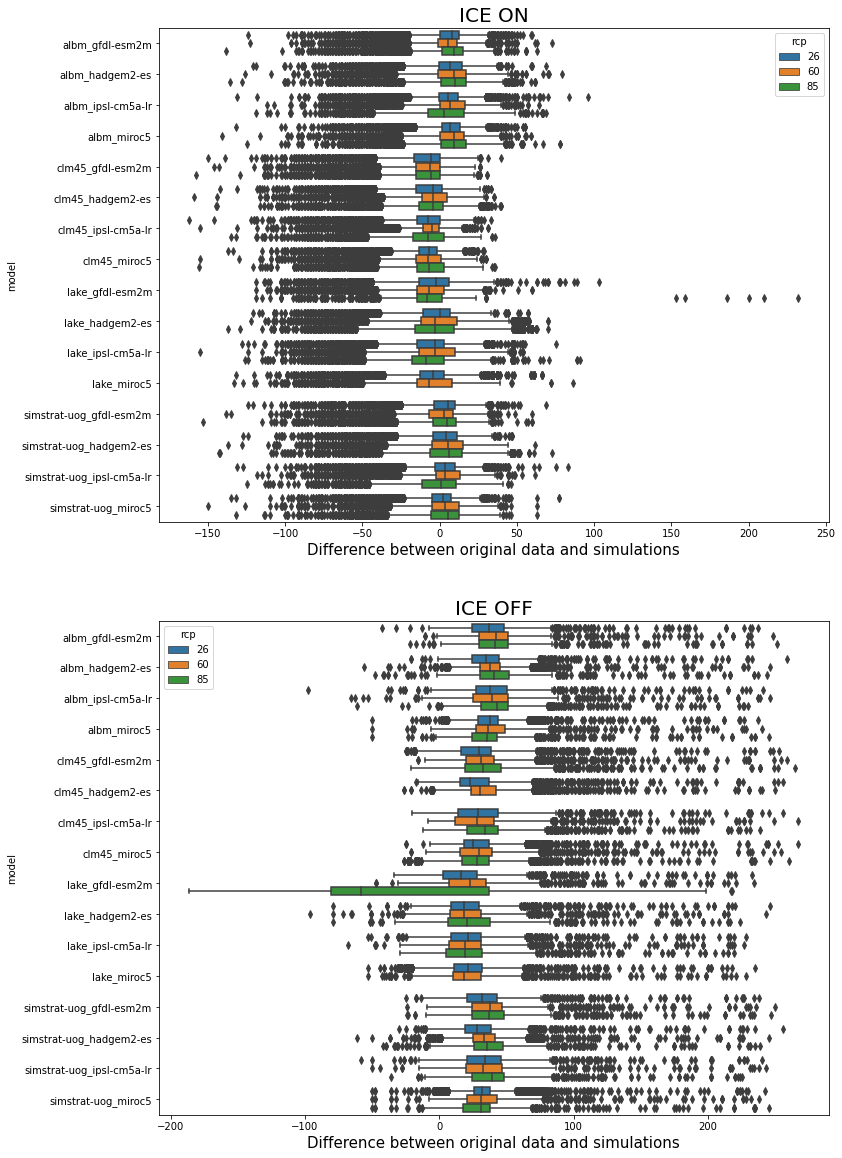

In [8]:
graph.figure(figsize=(12,20))

graph.subplot(2, 1, 1)
graph.title('ICE ON', fontsize=20)
sns.boxplot(y='model', x='diff_ice_on', hue='rcp', data=df_after_2005)
graph.xlabel('Difference between original data and simulations', fontsize=15)

graph.subplot(2, 1, 2)
graph.title('ICE OFF', fontsize=20)
sns.boxplot(y='model', x='diff_ice_off', hue='rcp', data=df_after_2005)
graph.xlabel('Difference between original data and simulations', fontsize=15)

# graph.savefig('/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/Graphs/comparison_original_model.png', 
#               bbox_inches='tight')
graph.show()

/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/arshad/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  inframe=inframe)
/home/arshad/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


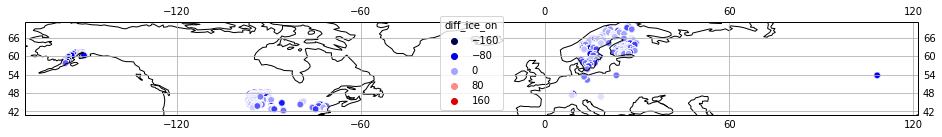

In [9]:
graph.figure(figsize=(16, 9))
ax = graph.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)

sns.scatterplot(df_diff_ice_on['lon'], df_diff_ice_on['lat'], hue=df_diff_ice_on['diff_ice_on'], 
                transform=ccrs.PlateCarree(), palette='seismic', s=40)

graph.show()

/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/arshad/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  inframe=inframe)
/home/arshad/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


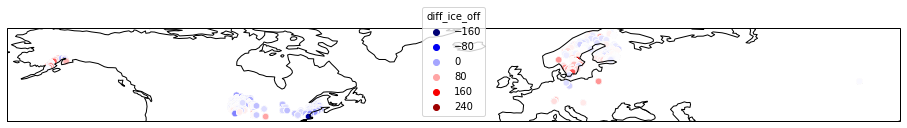

In [14]:
graph.figure(figsize=(16, 9))
# ax = graph.axes(projection=ccrs.Orthographic(0, 90))
ax = graph.axes(projection=ccrs.PlateCarree())

ax.coastlines(zorder=3)
# sns.color_palette("coolwarm", as_cmap=True, center=0)

sns.scatterplot(df_diff_ice_off['lon'], df_diff_ice_off['lat'], hue=df_diff_ice_off['diff_ice_off'], 
                transform=ccrs.PlateCarree(), palette='seismic', s=40)

graph.show()

/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/home/arshad/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  inframe=inframe)
/home/arshad/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


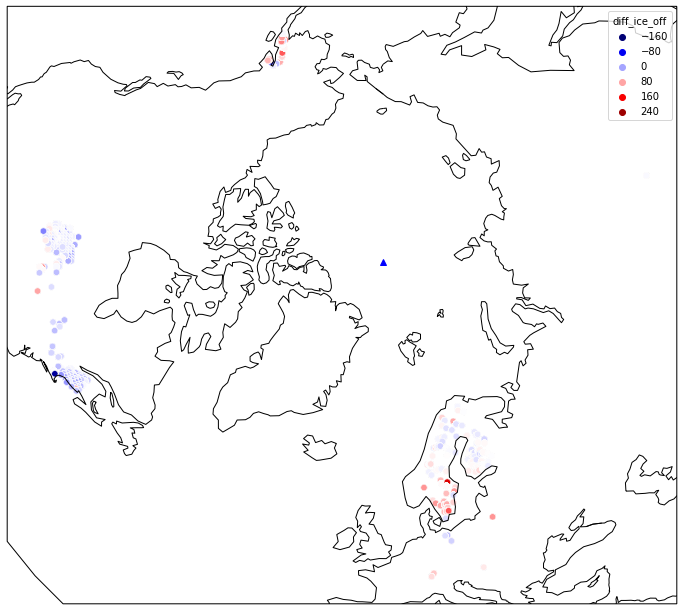

In [30]:
graph.figure(figsize=(12, 12))

ortho = ccrs.Orthographic(central_longitude=0, central_latitude=90)
geo = ccrs.Geodetic()

# create the geoaxes for an orthographic projection
ax = graph.axes(projection=ortho)

# transform lat/lons points to othographic points
points = ortho.transform_points(geo, df_diff_ice_off['lon'].values, df_diff_ice_off['lat'].values)

# plot native orthographic points                                                                                
sns.scatterplot(points[:, 0], points[:, 1], hue=df_diff_ice_off['diff_ice_off'], palette='seismic', s=40)

# plot north pole for reference (with a projection transform)                                                                                           
ax.plot([0], [90], 'b^', transform=geo)
ax.coastlines(zorder=3)                                                                                        

In [35]:
len(df_diff_ice_off)

393150

In [34]:
len(points[:, 0])

393150

/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


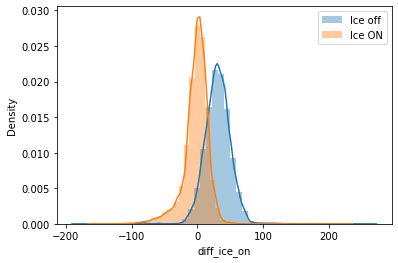

In [31]:
sns.distplot(df_diff_ice_off['diff_ice_off'], label='Ice off')
sns.distplot(df_diff_ice_on['diff_ice_on'], label='Ice ON')
graph.legend()
graph.show()

In [36]:
rcp_85 = df.loc[df['rcp'] == 85]
rcp_85 = rcp_85.loc[rcp_85['years'] > 2004]

rcp_85['grouped_iceend_year'] = rcp_85.groupby(['model', 'lat_long'])['grouped_iceend'].transform('mean')
rcp_85['grouped_iceoff_year'] = rcp_85.groupby(['model', 'lat_long'])['grouped_ice_off'].transform('mean')
rcp_85['diff_grouped_year'] = rcp_85['grouped_iceend_year'] - rcp_85['grouped_iceoff_year']

rcp_85['number_days_year'] = pd.to_datetime((rcp_85['years']).astype(int).astype(str) + '-12-31').dt.dayofyear
rcp_85['number_days_to_oct'] = pd.to_datetime((rcp_85['years']).astype(int).astype(str) + '-10-01').dt.dayofyear
rcp_85['transformed_ice_off'] = rcp_85['number_days_to_oct'] + rcp_85['iceend'] - rcp_85['number_days_year']
rcp_85['grouped_transformed_ice_off'] = rcp_85.groupby(['model', 'lat_long', 'years'])['transformed_ice_off'].transform('mean')

rcp_85['diff_ice_off_transformed'] = rcp_85['grouped_transformed_ice_off'] - rcp_85['grouped_ice_off']
rcp_85['location'] = np.where(rcp_85['lon'] > 0, 'EAST', 'WEST')
rcp_85['grouped_ice_off_years'] = rcp_85.groupby(['model', 'lat_long'])['diff_ice_off'].transform('mean')
rcp_85['grouped_ice_on_years'] = rcp_85.groupby(['model', 'lat_long'])['diff_ice_on'].transform('mean')

rcp_85['grouped_ice_off_year_periods'] = rcp_85.groupby(['model', 'lat_long', 'year_periods'])['diff_ice_off'].transform('mean')
rcp_85['grouped_ice_on_year_periods'] = rcp_85.groupby(['model', 'lat_long', 'year_periods'])['diff_ice_on'].transform('mean')

east_rcp_85 = rcp_85.loc[rcp_85['lon'] > 0]
west_rcp_85 = rcp_85.loc[rcp_85['lon'] < 0]

display(rcp_85.head())

lat    lon  icestart   years  rcp              model     lat_long  \
6611  69.75  27.25      29.0  2005.0   85    albm_gfdl-esm2m  69.75_27.25   
6614  69.75  27.25      33.0  2005.0   85    albm_hadgem2-es  69.75_27.25   
6617  69.75  27.25      46.0  2005.0   85  albm_ipsl-cm5a-lr  69.75_27.25   
6620  69.75  27.25      36.0  2005.0   85        albm_miroc5  69.75_27.25   
6623  69.75  27.25      17.0  2005.0   85   clm45_gfdl-esm2m  69.75_27.25   

      grouped_icestart  iceend  grouped_iceend  ...  diff_grouped_year  \
6611             -62.0   280.0           189.0  ...          41.500000   
6614             -58.0   276.0           185.0  ...          42.833333   
6617             -45.0   269.0           178.0  ...          42.500000   
6620             -55.0   278.0           187.0  ...          37.500000   
6623             -74.0   280.0           189.0  ...          44.166667   

      number_days_year  number_days_to_oct  transformed_ice_off  \
6611               365                 274                189.0   
6614               365                 274                185.0   
6617               365                 274                178.0   
6620               365                 274                187.0   
6623               365                 274                189.0   

      grouped_transformed_ice_off  diff_ice_off_transformed  \
6611                        189.0                      48.0   
6614                        185.0                      44.0   
6617                        178.0                      37.0   
6620                        187.0                      46.0   
6623                        189.0                      48.0   

      grouped_ice_off_years  grouped_ice_on_years  \
6611                   44.0              1.333333   
6614                   42.5              5.000000   
6617                   40.5              4.666667   
6620                   40.5              9.000000   
6623                   47.5            -16.333333   

     grouped_ice_off_year_periods grouped_ice_on_year_periods  
6611                         44.0                    1.333333  
6614                         42.5                    5.000000  
6617                         40.5                    4.666667  
6620                         40.5                    9.000000  
6623                         47.5                  -16.333333  

[5 rows x 32 columns]

In [37]:
rcp_85.columns

Index(['lat', 'lon', 'icestart', 'years', 'rcp', 'model', 'lat_long',
       'grouped_icestart', 'iceend', 'grouped_iceend', 'latitude', 'longitude',
       'ice_on_doy', 'ice_off_doy', 'grouped_ice_on', 'grouped_ice_off',
       'diff_ice_on', 'diff_ice_off', 'location', 'year_periods',
       'grouped_iceend_year', 'grouped_iceoff_year', 'diff_grouped_year',
       'number_days_year', 'number_days_to_oct', 'transformed_ice_off',
       'grouped_transformed_ice_off', 'diff_ice_off_transformed',
       'grouped_ice_off_years', 'grouped_ice_on_years',
       'grouped_ice_off_year_periods', 'grouped_ice_on_year_periods'],
      dtype='object')

In [38]:
mendota = rcp_85.loc[(rcp_85['lon'] < - 50) & (rcp_85['lat'] > 42) & (rcp_85['lat'] < 51) & (rcp_85['lon'] > - 84)]
mendota = mendota[['lat', 'lon', 'icestart', 'iceend', 'years', 'rcp', 'model', 'grouped_ice_on', 'grouped_ice_off', 
                   'grouped_iceend']]
mendota

lat    lon  icestart  iceend   years  rcp              model  \
893390   47.25 -68.75      60.0   248.0  2005.0   85    albm_gfdl-esm2m   
893393   47.25 -68.75      59.0   244.0  2005.0   85    albm_hadgem2-es   
893396   47.25 -68.75      58.0   249.0  2005.0   85  albm_ipsl-cm5a-lr   
893399   47.25 -68.75      62.0   233.0  2005.0   85        albm_miroc5   
893402   47.25 -68.75      49.0   267.0  2005.0   85   clm45_gfdl-esm2m   
...        ...    ...       ...     ...     ...  ...                ...   
1952445  42.75 -74.75      86.0   199.0  2015.0   85  lake_ipsl-cm5a-lr   
1952452  42.75 -74.75      69.0   216.0  2017.0   85    lake_hadgem2-es   
1952455  42.75 -74.75      63.0   200.0  2017.0   85  lake_ipsl-cm5a-lr   
1952462  42.75 -74.75      65.0   206.0  2018.0   85    lake_hadgem2-es   
1952465  42.75 -74.75      61.0   194.0  2018.0   85  lake_ipsl-cm5a-lr   

         grouped_ice_on  grouped_ice_off  grouped_iceend  
893390              NaN            119.0           157.0  
893393              NaN            119.0           153.0  
893396              NaN            119.0           158.0  
893399              NaN            119.0           142.0  
893402              NaN            119.0           176.0  
...                 ...              ...             ...  
1952445            45.0             72.0           108.0  
1952452             1.0            114.0           125.0  
1952455             1.0            114.0           109.0  
1952462            16.0            103.0           115.0  
1952465            16.0            103.0           103.0  

[16766 rows x 10 columns]

/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


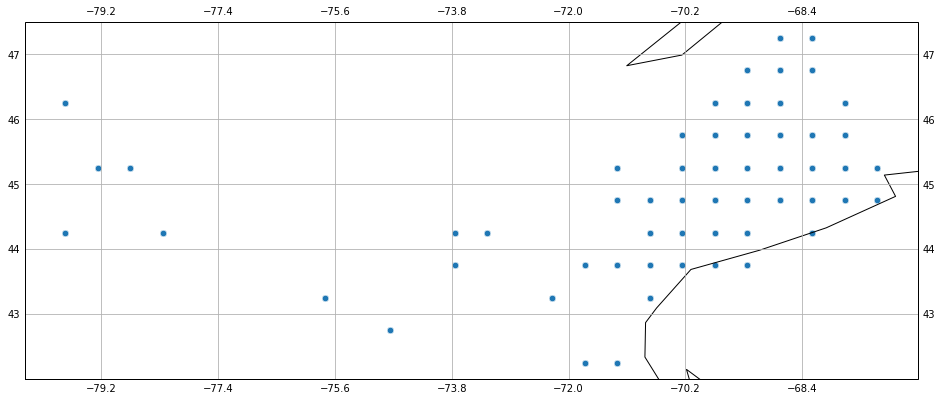

In [39]:
graph.figure(figsize=(16, 9))
ax = graph.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)

# sns.color_palette("coolwarm", as_cmap=True, center=0)

sns.scatterplot(mendota['lon'], mendota['lat'], 
                transform=ccrs.PlateCarree(), palette='seismic', s=40)

graph.show()

In [36]:
outlier_diff_ice_off.columns

Index(['lat', 'lon', 'icestart', 'years', 'rcp', 'model', 'lat_long',
       'grouped_icestart', 'iceend', 'grouped_iceend', 'latitude', 'longitude',
       'grouped_ice_on', 'grouped_ice_off', 'diff_ice_on', 'diff_ice_off',
       'number_days_year', 'number_days_to_oct', 'transformed_ice_off',
       'grouped_transformed_ice_off', 'diff_ice_off_transformed'],
      dtype='object')

In [40]:
outlier_diff_ice_off = rcp_85.loc[rcp_85['diff_ice_off_transformed'] > 25]
outlier_diff_ice_off = outlier_diff_ice_off[['lat', 'lon', 'icestart', 'years', 'rcp', 'model', 'lat_long',
       'grouped_icestart', 'iceend', 'grouped_iceend', 
       'grouped_ice_on', 'grouped_ice_off', 'diff_ice_on', 'diff_ice_off',
       'transformed_ice_off',
       'grouped_transformed_ice_off', 'diff_ice_off_transformed']]
outlier_diff_ice_off.head()

lat    lon  icestart   years  rcp              model     lat_long  \
6611  69.75  27.25      29.0  2005.0   85    albm_gfdl-esm2m  69.75_27.25   
6614  69.75  27.25      33.0  2005.0   85    albm_hadgem2-es  69.75_27.25   
6617  69.75  27.25      46.0  2005.0   85  albm_ipsl-cm5a-lr  69.75_27.25   
6620  69.75  27.25      36.0  2005.0   85        albm_miroc5  69.75_27.25   
6623  69.75  27.25      17.0  2005.0   85   clm45_gfdl-esm2m  69.75_27.25   

      grouped_icestart  iceend  grouped_iceend  grouped_ice_on  \
6611             -62.0   280.0           189.0           -57.0   
6614             -58.0   276.0           185.0           -57.0   
6617             -45.0   269.0           178.0           -57.0   
6620             -55.0   278.0           187.0           -57.0   
6623             -74.0   280.0           189.0           -57.0   

      grouped_ice_off  diff_ice_on  diff_ice_off  transformed_ice_off  \
6611            141.0         -5.0          48.0                189.0   
6614            141.0         -1.0          44.0                185.0   
6617            141.0         12.0          37.0                178.0   
6620            141.0          2.0          46.0                187.0   
6623            141.0        -17.0          48.0                189.0   

      grouped_transformed_ice_off  diff_ice_off_transformed  
6611                        189.0                      48.0  
6614                        185.0                      44.0  
6617                        178.0                      37.0  
6620                        187.0                      46.0  
6623                        189.0                      48.0

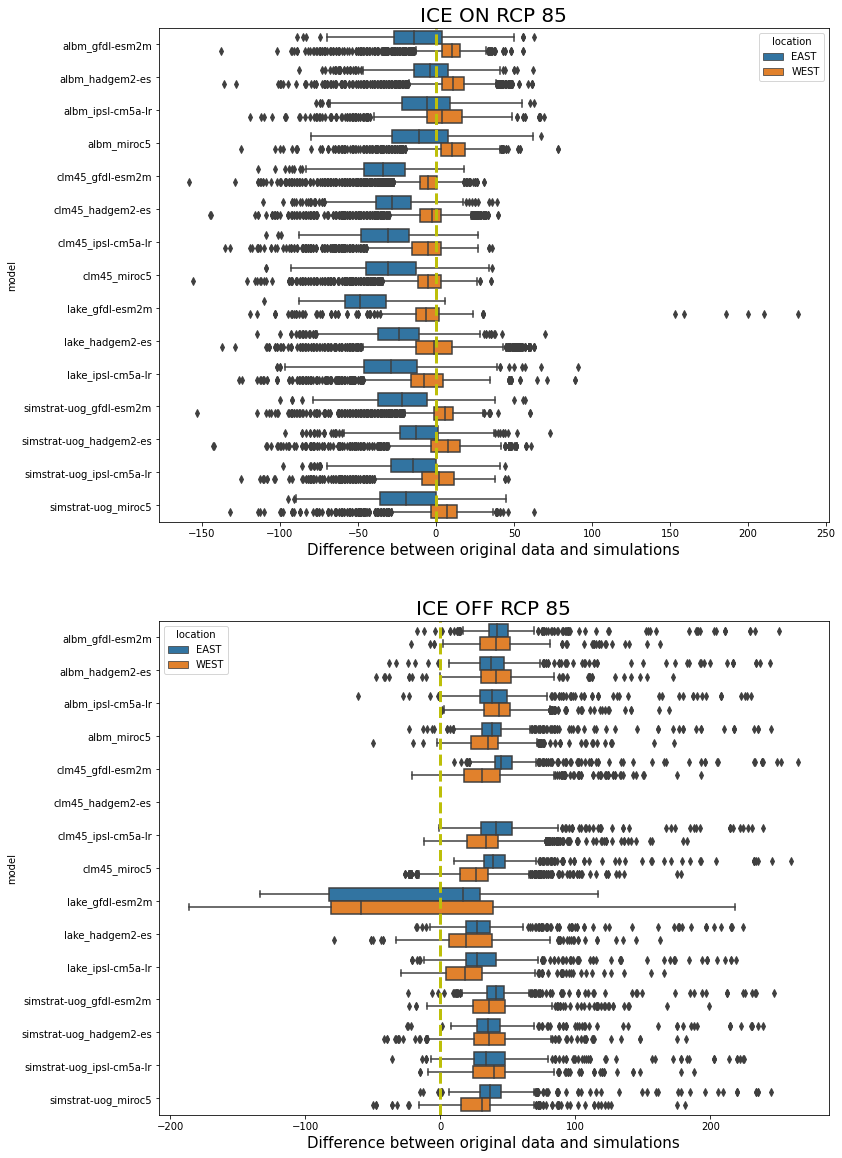

In [41]:
graph.figure(figsize=(12,20))

graph.subplot(2, 1, 1)
graph.title('ICE ON RCP 85', fontsize=20)
sns.boxplot(y='model', x='diff_ice_on', hue='location', data=rcp_85)
graph.xlabel('Difference between original data and simulations', fontsize=15)
graph.axvline(0, linestyle='--', linewidth=3, color='#BDBF09')

graph.subplot(2, 1, 2)
graph.title('ICE OFF RCP 85', fontsize=20)
sns.boxplot(y='model', x='diff_ice_off', hue='location', data=rcp_85)
graph.xlabel('Difference between original data and simulations', fontsize=15)
graph.axvline(0, linestyle='--', linewidth=3, color='#BDBF09')

graph.show()

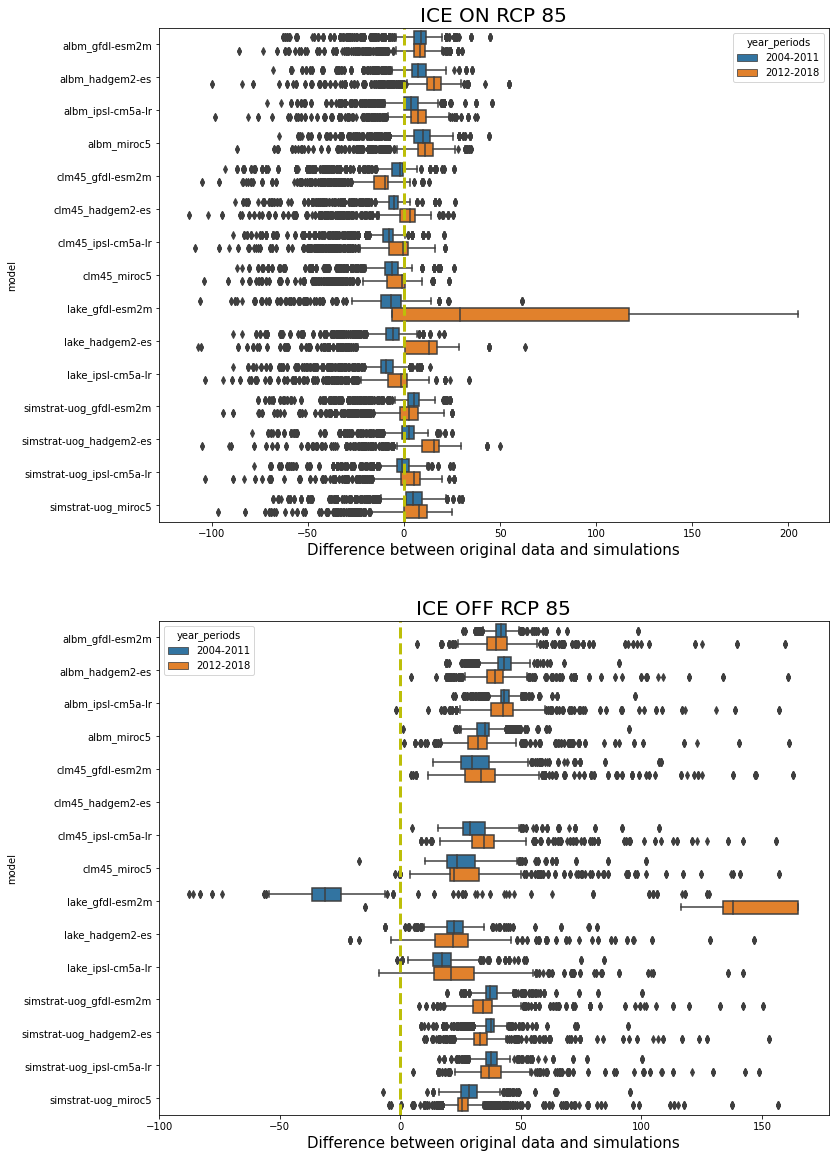

In [42]:
graph.figure(figsize=(12,20))

graph.subplot(2, 1, 1)
graph.title('ICE ON RCP 85', fontsize=20)
sns.boxplot(y='model', x='grouped_ice_on_year_periods', hue='year_periods', data=rcp_85)
graph.xlabel('Difference between original data and simulations', fontsize=15)
graph.axvline(0, linestyle='--', linewidth=3, color='#BDBF09')

graph.subplot(2, 1, 2)
graph.title('ICE OFF RCP 85', fontsize=20)
sns.boxplot(y='model', x='grouped_ice_off_year_periods', hue='year_periods', data=rcp_85)
graph.xlabel('Difference between original data and simulations', fontsize=15)
graph.axvline(0, linestyle='--', linewidth=3, color='#BDBF09')

graph.show()

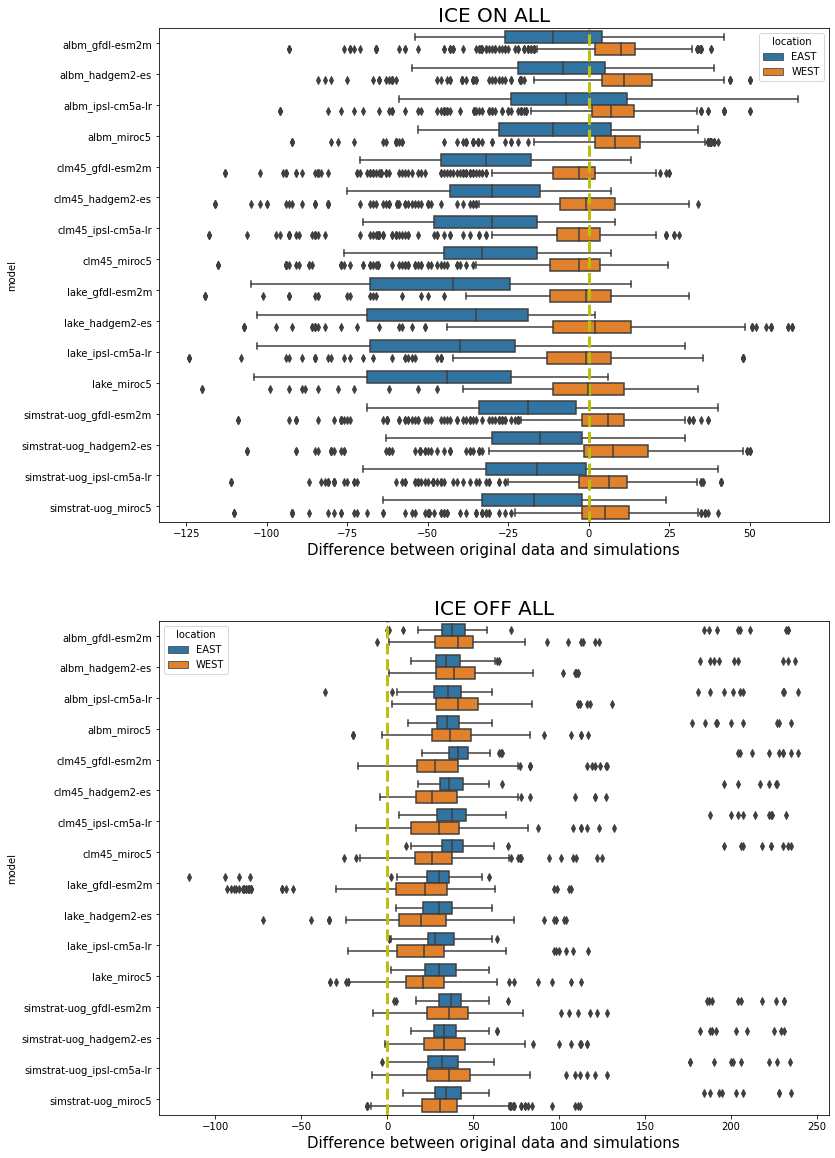

In [69]:
graph.figure(figsize=(12,20))

graph.subplot(2, 1, 1)
graph.title('ICE ON ALL', fontsize=20)
sns.boxplot(y='model', x='diff_ice_on', hue='location', data=df)
graph.xlabel('Difference between original data and simulations', fontsize=15)
graph.axvline(0, linestyle='--', linewidth=3, color='#BDBF09')

graph.subplot(2, 1, 2)
graph.title('ICE OFF ALL', fontsize=20)
sns.boxplot(y='model', x='diff_ice_off', hue='location', data=df)
graph.xlabel('Difference between original data and simulations', fontsize=15)
graph.axvline(0, linestyle='--', linewidth=3, color='#BDBF09')

graph.show()

/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


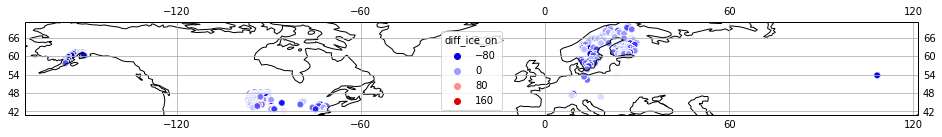

In [43]:
graph.figure(figsize=(16, 9))
ax = graph.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)

# sns.color_palette("coolwarm", as_cmap=True, center=0)

sns.scatterplot(rcp_85['lon'], rcp_85['lat'], hue=rcp_85['diff_ice_on'], 
                transform=ccrs.PlateCarree(), palette='seismic', s=40)

graph.show()

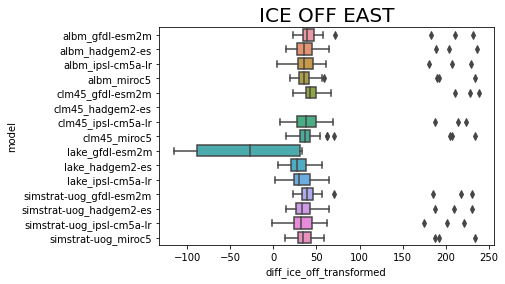

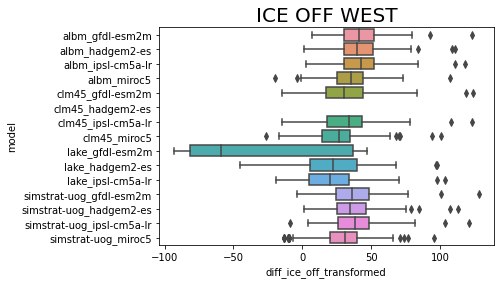

In [32]:
graph.title('ICE OFF EAST', fontsize=20)
sns.boxplot(y='model', x='diff_ice_off_transformed', data=east_rcp_85)
graph.show()

graph.title('ICE OFF WEST', fontsize=20)
sns.boxplot(y='model', x='diff_ice_off_transformed', data=west_rcp_85)
graph.show()

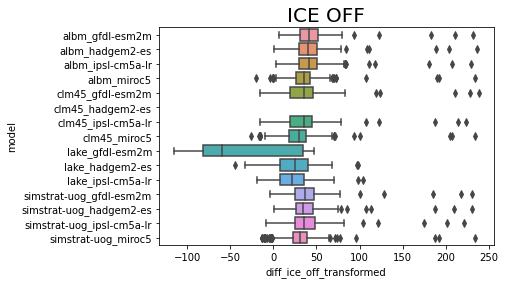

In [30]:
graph.title('ICE OFF', fontsize=20)
sns.boxplot(y='model', x='diff_ice_off_transformed', data=rcp_85)
graph.show()

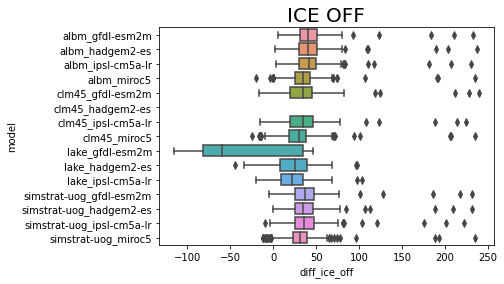

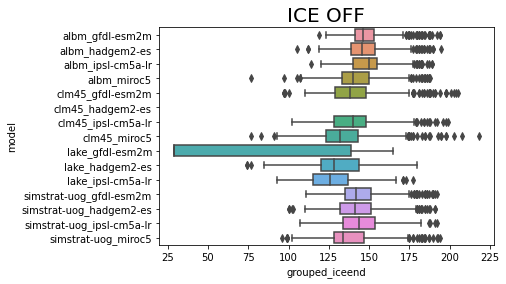

In [13]:
graph.title('ICE OFF', fontsize=20)
sns.boxplot(y='model', x='diff_ice_off', data=rcp_85)
graph.show()

# Trend for Anomaly
- 1950-2018
- 2005-2018

In [3]:
%%time
df = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/merged_kev_iestyn_apr_26_2021.csv')
print(len(df))
df.dropna(subset=['diff_ice_on', 'diff_ice_off'], how='all', inplace=True)
print(len(df))
df_after_2005 = df.loc[df['years'] > 2004]
display(df_after_2005.head())

1954156
1944496


lat    lon  icestart   years  rcp            model     lat_long  \
6609  69.75  27.25      29.0  2005.0   26  albm_gfdl-esm2m  69.75_27.25   
6610  69.75  27.25      29.0  2005.0   60  albm_gfdl-esm2m  69.75_27.25   
6611  69.75  27.25      29.0  2005.0   85  albm_gfdl-esm2m  69.75_27.25   
6612  69.75  27.25      33.0  2005.0   26  albm_hadgem2-es  69.75_27.25   
6613  69.75  27.25      33.0  2005.0   60  albm_hadgem2-es  69.75_27.25   

      grouped_icestart  iceend  grouped_iceend  latitude  longitude  \
6609             -62.0   280.0           189.0     69.75      27.25   
6610             -62.0   280.0           189.0     69.75      27.25   
6611             -62.0   280.0           189.0     69.75      27.25   
6612             -58.0   276.0           185.0     69.75      27.25   
6613             -58.0   276.0           185.0     69.75      27.25   

      ice_on_doy  ice_off_doy  grouped_ice_on  grouped_ice_off  diff_ice_on  \
6609       -57.0        141.0           -57.0            141.0         -5.0   
6610       -57.0        141.0           -57.0            141.0         -5.0   
6611       -57.0        141.0           -57.0            141.0         -5.0   
6612       -57.0        141.0           -57.0            141.0         -1.0   
6613       -57.0        141.0           -57.0            141.0         -1.0   

      diff_ice_off  
6609          48.0  
6610          48.0  
6611          48.0  
6612          44.0  
6613          44.0

CPU times: user 3.12 s, sys: 1.58 s, total: 4.7 s
Wall time: 4.74 s


In [4]:
df.columns

Index(['lat', 'lon', 'icestart', 'years', 'rcp', 'model', 'lat_long',
       'grouped_icestart', 'iceend', 'grouped_iceend', 'latitude', 'longitude',
       'ice_on_doy', 'ice_off_doy', 'grouped_ice_on', 'grouped_ice_off',
       'diff_ice_on', 'diff_ice_off'],
      dtype='object')

In [5]:
df_after_2005_ice_on = df_after_2005[['lat', 'lon', 'icestart', 'years', 'rcp', 'model', 'lat_long',
       'grouped_icestart', 'latitude', 'longitude', 'grouped_ice_on']]
df_after_2005_ice_on.dropna(inplace=True)

df_after_2005_ice_off = df_after_2005[['lat', 'lon', 'iceend', 'years', 'rcp', 'model', 'lat_long',
       'grouped_iceend', 'latitude', 'longitude', 'grouped_ice_off']]
df_after_2005_ice_off.dropna(inplace=True)

print(len(df_after_2005_ice_on), len(df_after_2005_ice_off))
display(df_after_2005_ice_on.head(), df_after_2005_ice_off.head())

# WAS 14639 18195


328811 393150


lat    lon  icestart   years  rcp            model     lat_long  \
6609  69.75  27.25      29.0  2005.0   26  albm_gfdl-esm2m  69.75_27.25   
6610  69.75  27.25      29.0  2005.0   60  albm_gfdl-esm2m  69.75_27.25   
6611  69.75  27.25      29.0  2005.0   85  albm_gfdl-esm2m  69.75_27.25   
6612  69.75  27.25      33.0  2005.0   26  albm_hadgem2-es  69.75_27.25   
6613  69.75  27.25      33.0  2005.0   60  albm_hadgem2-es  69.75_27.25   

      grouped_icestart  latitude  longitude  grouped_ice_on  
6609             -62.0     69.75      27.25           -57.0  
6610             -62.0     69.75      27.25           -57.0  
6611             -62.0     69.75      27.25           -57.0  
6612             -58.0     69.75      27.25           -57.0  
6613             -58.0     69.75      27.25           -57.0

lat    lon  iceend   years  rcp            model     lat_long  \
6609  69.75  27.25   280.0  2005.0   26  albm_gfdl-esm2m  69.75_27.25   
6610  69.75  27.25   280.0  2005.0   60  albm_gfdl-esm2m  69.75_27.25   
6611  69.75  27.25   280.0  2005.0   85  albm_gfdl-esm2m  69.75_27.25   
6612  69.75  27.25   276.0  2005.0   26  albm_hadgem2-es  69.75_27.25   
6613  69.75  27.25   276.0  2005.0   60  albm_hadgem2-es  69.75_27.25   

      grouped_iceend  latitude  longitude  grouped_ice_off  
6609           189.0     69.75      27.25            141.0  
6610           189.0     69.75      27.25            141.0  
6611           189.0     69.75      27.25            141.0  
6612           185.0     69.75      27.25            141.0  
6613           185.0     69.75      27.25            141.0

### Ice ON / IceStart

In [34]:
orig_ice_off = df_ice_off[['years', 'grouped_ice_off', 'lat_long']]
orig_ice_off.drop_duplicates(inplace=True)
print(len(orig_ice_off))

model = sm.OLS(orig_ice_off['grouped_ice_off'], sm.add_constant(orig_ice_off['years'])).fit()

orig_ice_off_slope = ['ice_off', 'orig', 'none', 
                      model.params.values[1], 
                      model.conf_int()[0][1], model.conf_int()[1][1], model.bse.values[1]]

414


/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/arshad/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [47]:
orig_ice_on = df_after_2005_ice_on[['years', 'grouped_ice_on', 'lat_long']]
orig_ice_on.drop_duplicates(inplace=True)
print(len(orig_ice_on))

model = sm.OLS(orig_ice_on['grouped_ice_on'], sm.add_constant(orig_ice_on['years'])).fit()

orig_ice_on_slope = ['ice_on', 'orig', 'none', 
                     model.params.values[1], 
                     model.conf_int()[0][1], model.conf_int()[1][1], model.bse.values[1]]

1744


/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


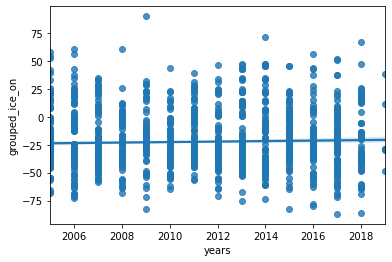

In [48]:
sns.regplot(orig_ice_on['years'], orig_ice_on['grouped_ice_on'])

## Calculate linear trends

In [6]:
orig_ice_on_slopes = []

for location in tqdm(df_after_2005_ice_on['lat_long'].unique()):
    temp_ice_on = df_after_2005_ice_on.loc[df_after_2005_ice_on['lat_long'] == location]
    temp_ice_on = temp_ice_on[['years', 'grouped_ice_on']]
    temp_ice_on.drop_duplicates(inplace=True)
    
    if len(temp_ice_on) < 10:
        continue
        
    x_cons = sm.add_constant(temp_ice_on['years'])
    model = sm.OLS(temp_ice_on['grouped_ice_on'], x_cons).fit()
    slope = model.params.values[1]
    
    mean = temp_ice_on['grouped_ice_on'].mean() # mean
    cov = stats.variation(temp_ice_on['grouped_ice_on']) # cov
    start_year = 2005
    
    orig_ice_on_slopes.append([location, len(temp_ice_on), 'ice_on', start_year, mean, slope, cov])

100%|██████████| 209/209 [00:03<00:00, 56.06it/s]


In [7]:
df_orig_ice_on_slopes = pd.DataFrame(orig_ice_on_slopes, 
                                columns = ['lat_long', 'len_in_situ_data', 'variable', 'start_year', 'mean_in_situ', 
                                           'slope_in_situ', 'cov_in_situ'])
# df_orig_ice_on_slopes.sort_values(by='slope_in_situ', ascending=False, inplace=True)
display(df_orig_ice_on_slopes.head())

lat_long  len_in_situ_data variable  start_year  mean_in_situ  \
0  69.25_20.75                14   ice_on        2005    -44.142857   
1  69.25_26.75                12   ice_on        2005    -43.083333   
2  68.75_28.25                14   ice_on        2005    -58.785714   
3  68.25_23.75                13   ice_on        2005    -57.153846   
4  67.75_20.75                14   ice_on        2005    -57.357143   

   slope_in_situ  cov_in_situ  
0       0.628571    -0.209533  
1       0.521090    -0.208566  
2       0.731868    -0.181192  
3       1.335453    -0.159305  
4      -0.221978    -0.154767

  0%|          | 0/104 [00:00<?, ?it/s]

58.25_-155.75
Slope is 4.303030303029292


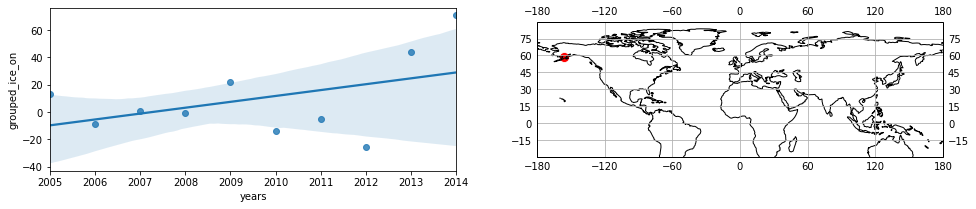

  1%|          | 1/104 [00:00<01:26,  1.20it/s]

58.75_-155.75
Slope is 3.030303030302663


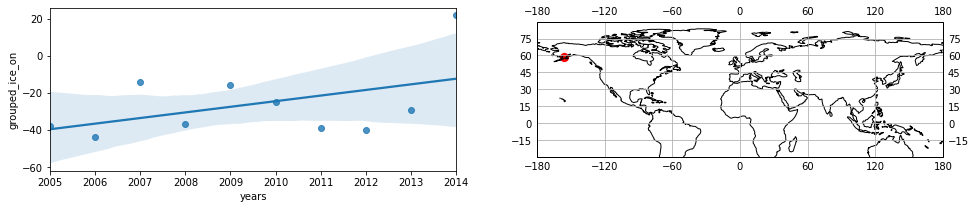

  2%|▏         | 2/104 [00:01<01:30,  1.13it/s]

59.25_-155.25
Slope is 2.693939393938933


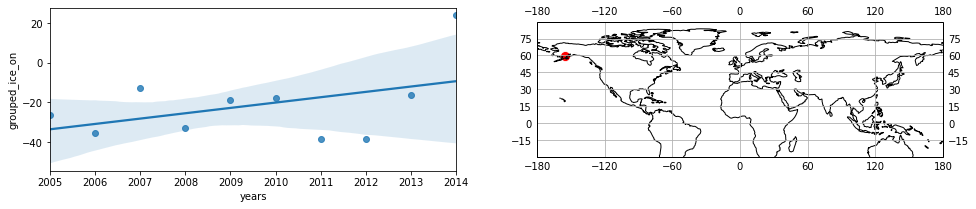

  3%|▎         | 3/104 [00:02<01:30,  1.12it/s]

52.25_13.75
Slope is 2.1330827067669347


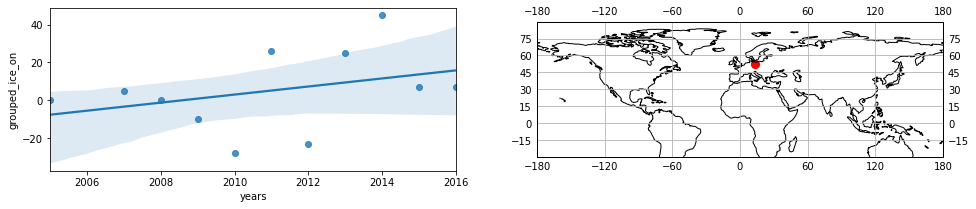

  4%|▍         | 4/104 [00:03<01:32,  1.08it/s]

60.75_-153.75
Slope is 2.027272727272445


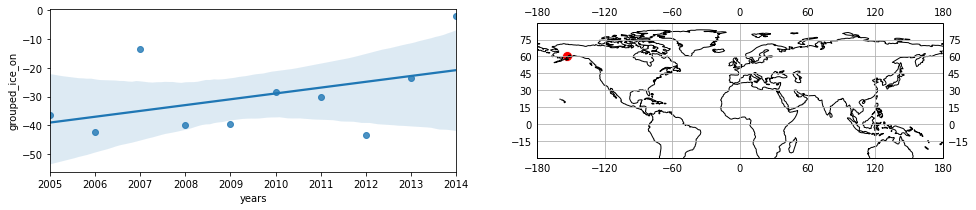

  5%|▍         | 5/104 [00:04<01:34,  1.05it/s]

60.25_-150.25
Slope is 1.957575757575208


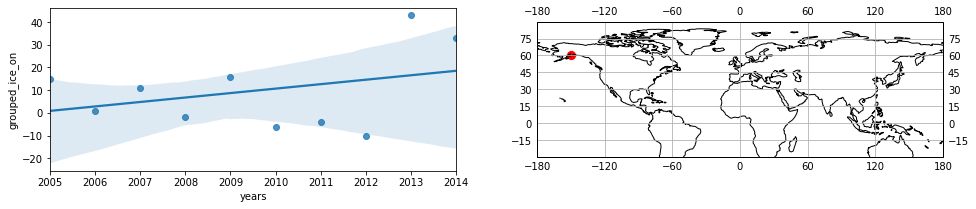

  6%|▌         | 6/104 [00:05<01:31,  1.07it/s]

65.75_15.75
Slope is 1.591208791208814


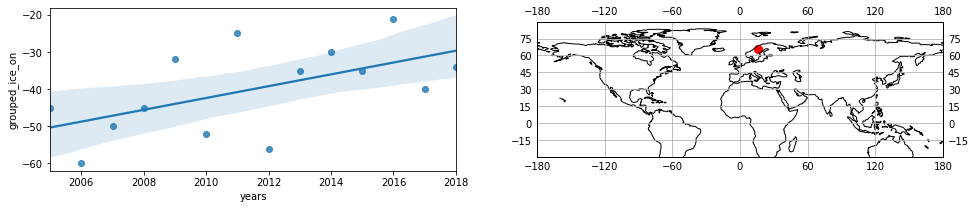

  7%|▋         | 7/104 [00:06<01:26,  1.12it/s]

68.25_23.75
Slope is 1.3354525056096334


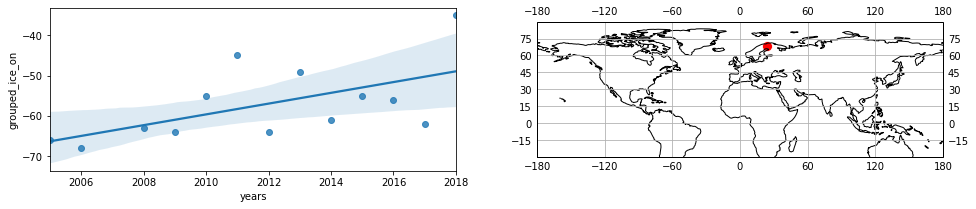

  8%|▊         | 8/104 [00:07<01:24,  1.13it/s]

47.25_-93.75
Slope is 1.1556693306694088


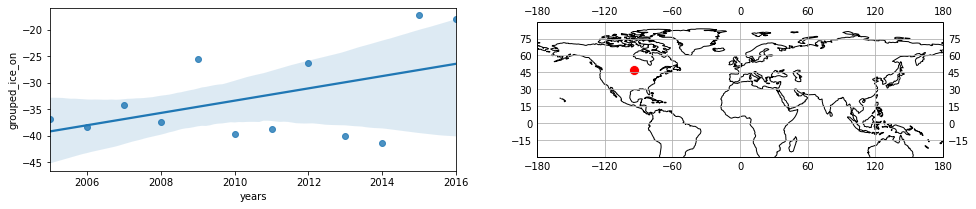

  9%|▊         | 9/104 [00:08<01:27,  1.08it/s]

46.75_-93.25
Slope is 1.145820845820948


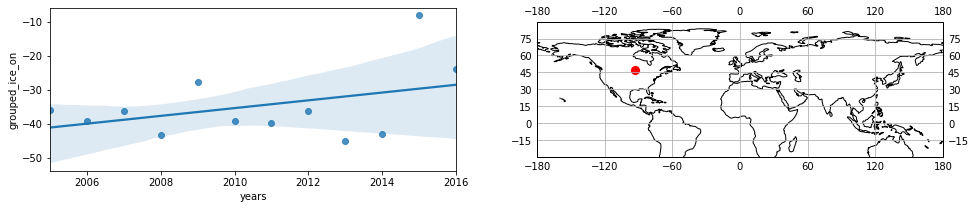

 10%|▉         | 10/104 [00:09<01:29,  1.05it/s]

45.75_-95.25
Slope is 1.0480283605284413


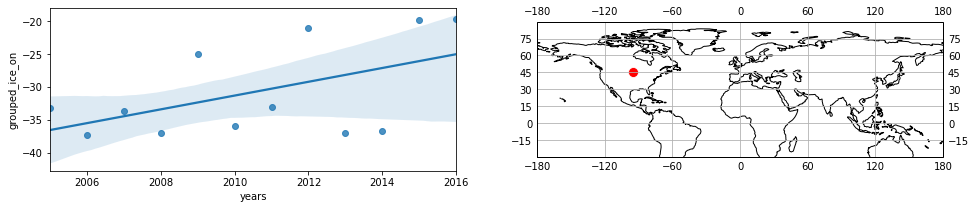

 11%|█         | 11/104 [00:10<01:29,  1.04it/s]

62.75_24.25
Slope is 1.0351648351648477


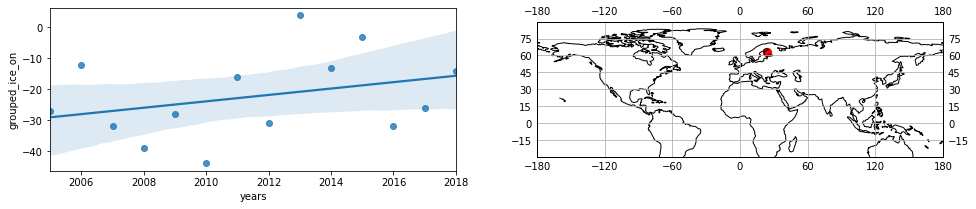

 12%|█▏        | 12/104 [00:11<01:28,  1.04it/s]

46.25_-95.75
Slope is 0.9530885780886132


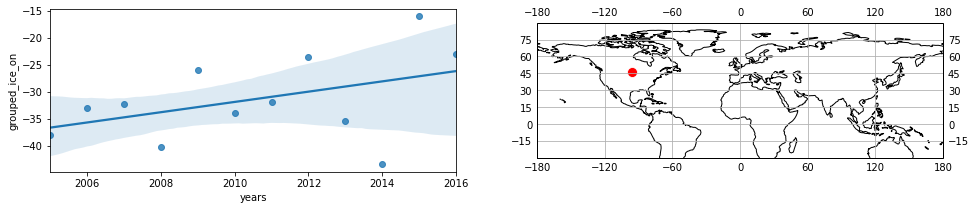

 12%|█▎        | 13/104 [00:12<01:27,  1.04it/s]

62.75_25.25
Slope is 0.9230769230770585


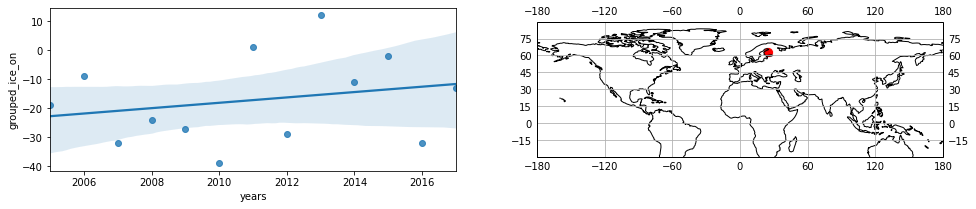

 13%|█▎        | 14/104 [00:13<01:25,  1.05it/s]

61.25_22.25
Slope is 0.9156853509185454


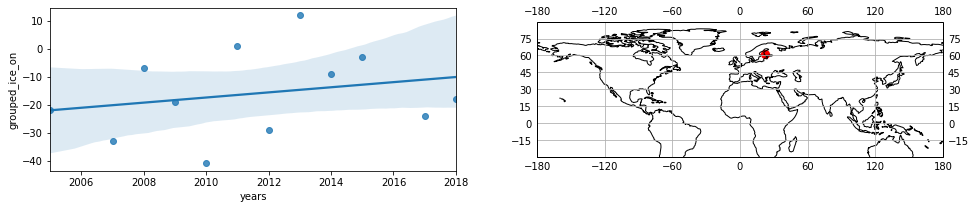

 14%|█▍        | 15/104 [00:14<01:24,  1.05it/s]

44.75_-93.25
Slope is 0.8875781203096853


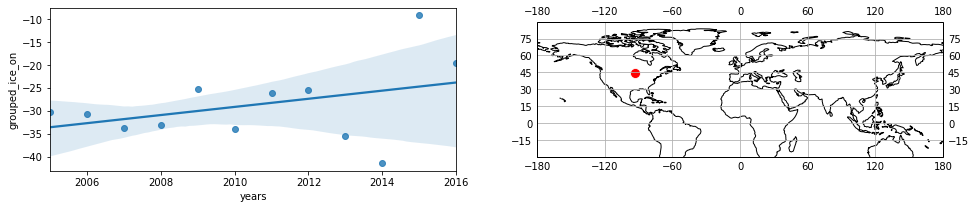

 15%|█▌        | 16/104 [00:15<01:23,  1.05it/s]

61.25_-150.75
Slope is 0.8848484848484994


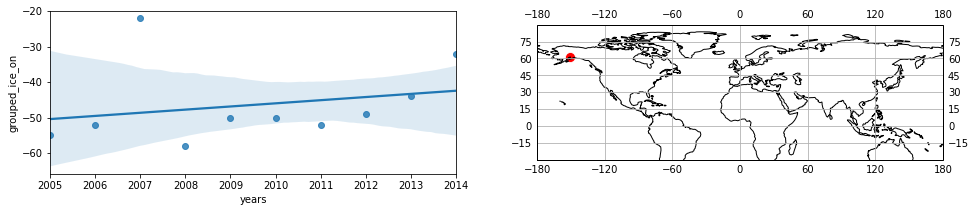

 16%|█▋        | 17/104 [00:17<01:51,  1.29s/it]

46.25_-94.75
Slope is 0.8350000000000151


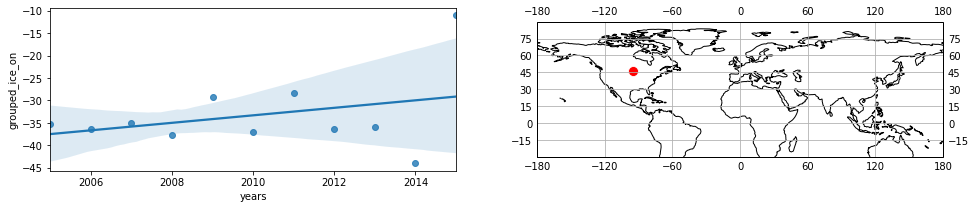

 17%|█▋        | 18/104 [00:18<01:43,  1.21s/it]

45.25_-92.75
Slope is 0.8141507615192382


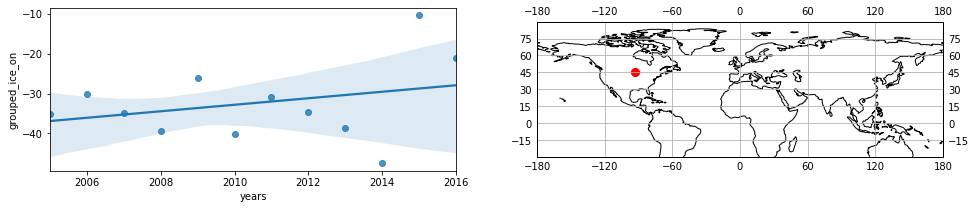

 18%|█▊        | 19/104 [00:19<01:36,  1.13s/it]

44.25_-93.75
Slope is 0.7656676656677113


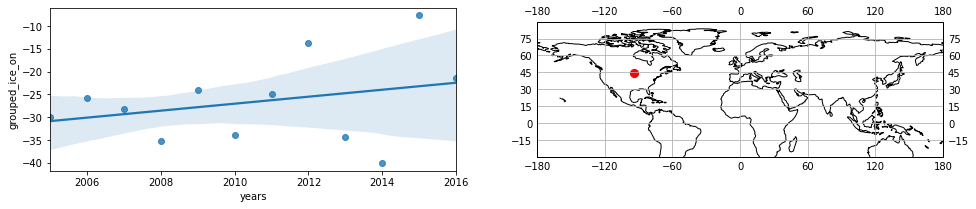

 19%|█▉        | 20/104 [00:19<01:27,  1.04s/it]

60.75_-150.75
Slope is 0.7454545454546162


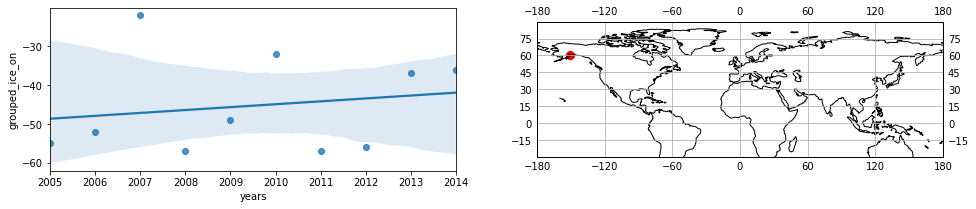

 20%|██        | 21/104 [00:20<01:23,  1.01s/it]

46.75_-92.25
Slope is 0.7415151515151535


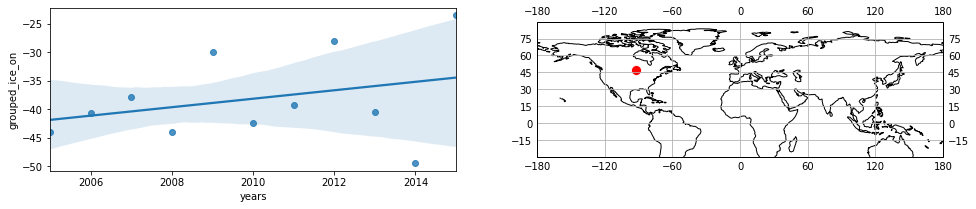

 21%|██        | 22/104 [00:21<01:22,  1.01s/it]

68.75_28.25
Slope is 0.731868131868151


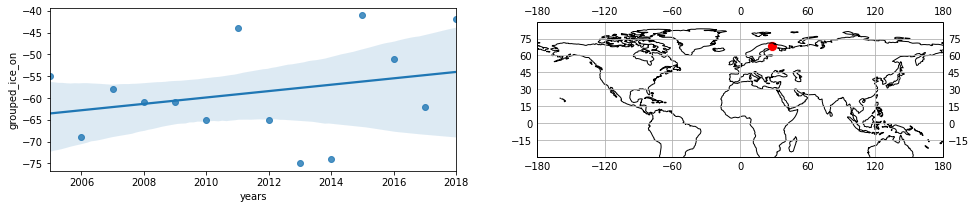

 22%|██▏       | 23/104 [00:22<01:21,  1.00s/it]

46.25_-93.75
Slope is 0.7300442204854671


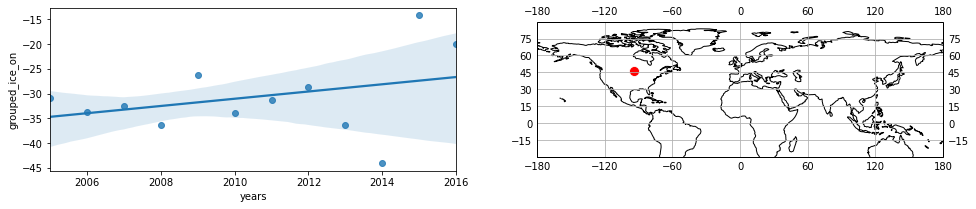

 23%|██▎       | 24/104 [00:23<01:18,  1.01it/s]

48.25_-90.25
Slope is 0.6848484848485796


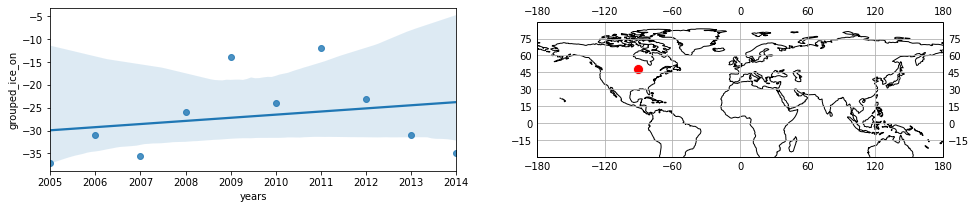

 24%|██▍       | 25/104 [00:24<01:19,  1.00s/it]

63.25_25.25
Slope is 0.6648351648352857


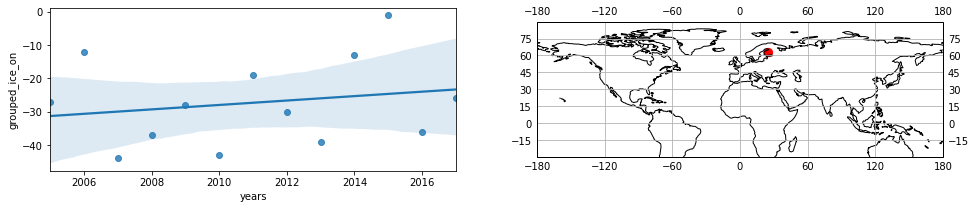

 25%|██▌       | 26/104 [00:26<01:29,  1.15s/it]

46.75_-92.75
Slope is 0.6459720730397245


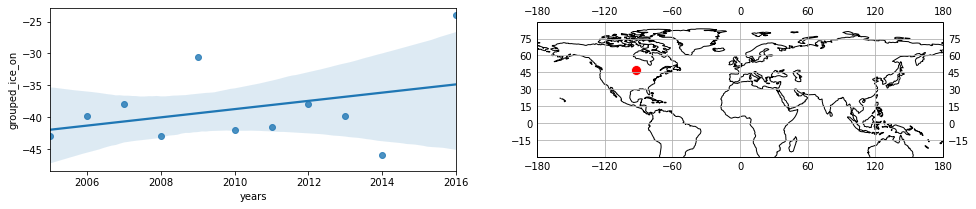

 26%|██▌       | 27/104 [00:27<01:34,  1.23s/it]

53.75_108.25
Slope is 0.6395604395604465


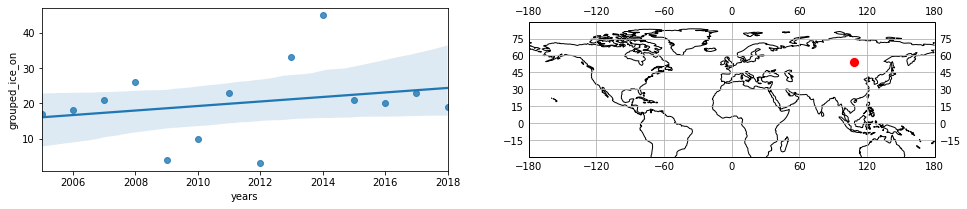

 27%|██▋       | 28/104 [00:29<01:39,  1.31s/it]

69.25_20.75
Slope is 0.6285714285714539


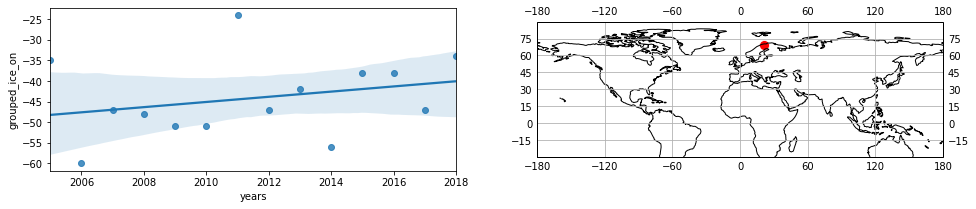

 28%|██▊       | 29/104 [00:30<01:31,  1.23s/it]

62.75_24.75
Slope is 0.5906593406593806


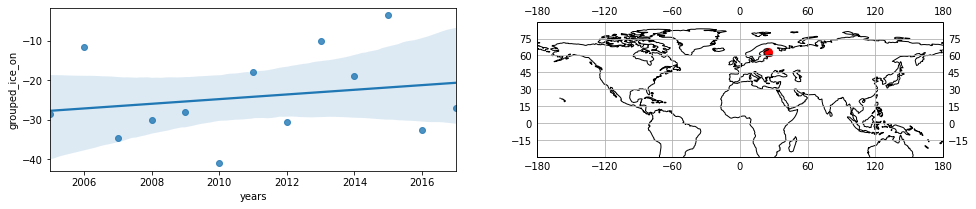

 29%|██▉       | 30/104 [00:31<01:27,  1.18s/it]

47.75_-94.75
Slope is 0.5812954091363876


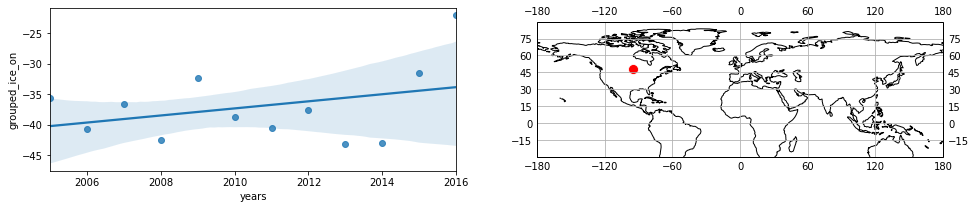

 30%|██▉       | 31/104 [00:32<01:20,  1.10s/it]

43.25_-75.75
Slope is 0.5736263736263663


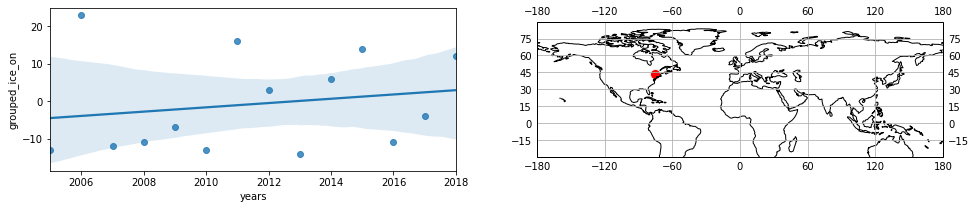

 31%|███       | 32/104 [00:33<01:19,  1.10s/it]

61.25_26.25
Slope is 0.5629370629371391


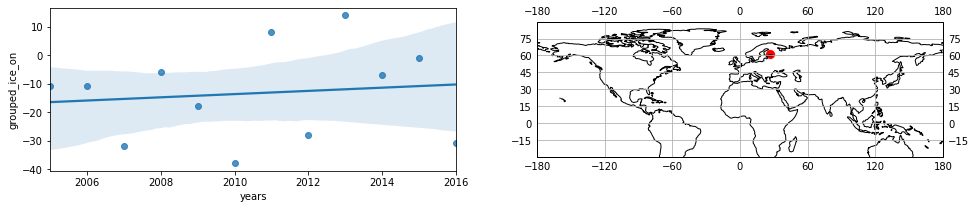

 32%|███▏      | 33/104 [00:34<01:16,  1.07s/it]

63.25_25.75
Slope is 0.5326530612244609


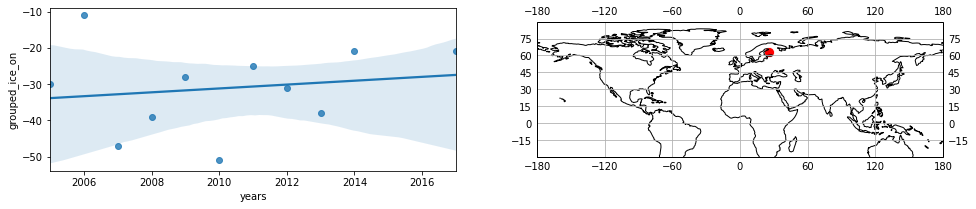

 33%|███▎      | 34/104 [00:35<01:12,  1.04s/it]

69.25_26.75
Slope is 0.5210896309314927


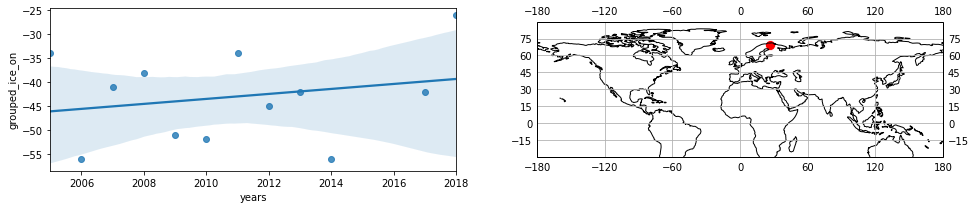

 34%|███▎      | 35/104 [00:36<01:06,  1.04it/s]

45.25_-93.25
Slope is 0.5102661184166201


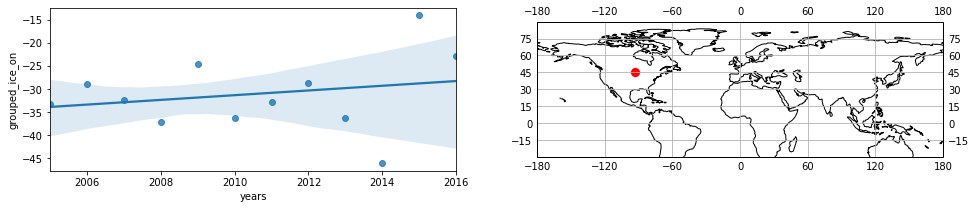

 35%|███▍      | 36/104 [00:36<00:59,  1.15it/s]

47.75_-91.75
Slope is 0.47435897435904906


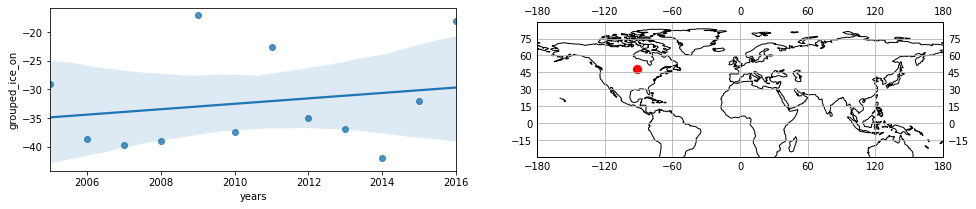

 36%|███▌      | 37/104 [00:37<01:03,  1.06it/s]

45.75_-94.75
Slope is 0.4575507825507912


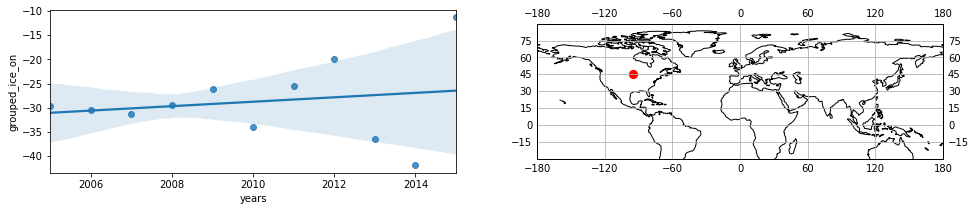

 37%|███▋      | 38/104 [00:38<01:03,  1.03it/s]

47.75_-93.25
Slope is 0.4264580873671777


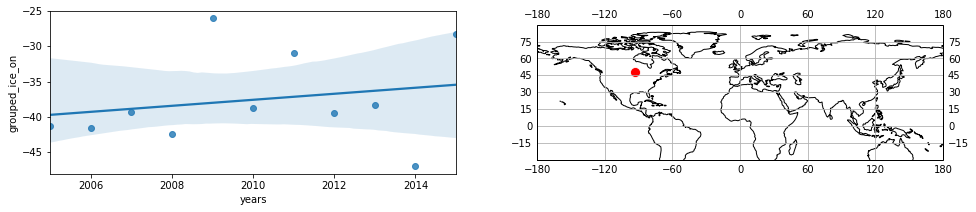

 38%|███▊      | 39/104 [00:40<01:17,  1.19s/it]

64.25_27.25
Slope is 0.41700680272105917


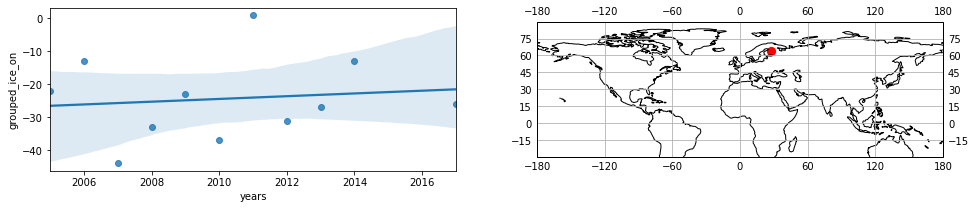

 38%|███▊      | 40/104 [00:41<01:11,  1.12s/it]

45.25_-94.25
Slope is 0.4025839545070786


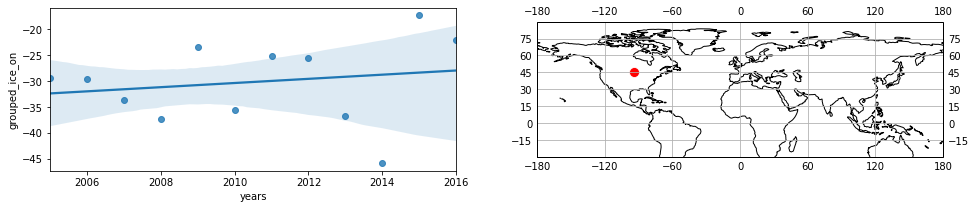

 39%|███▉      | 41/104 [00:42<01:05,  1.03s/it]

44.75_-93.75
Slope is 0.3891757592365166


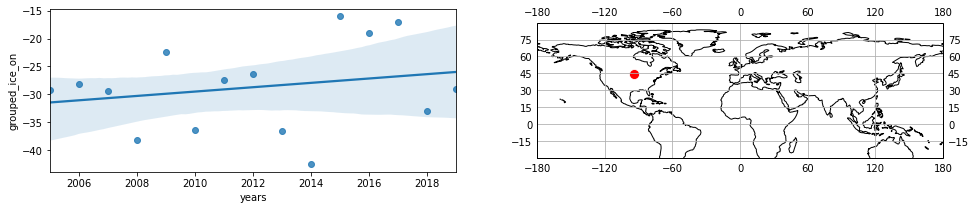

 40%|████      | 42/104 [00:43<01:01,  1.00it/s]

62.75_26.75
Slope is 0.3791208791208761


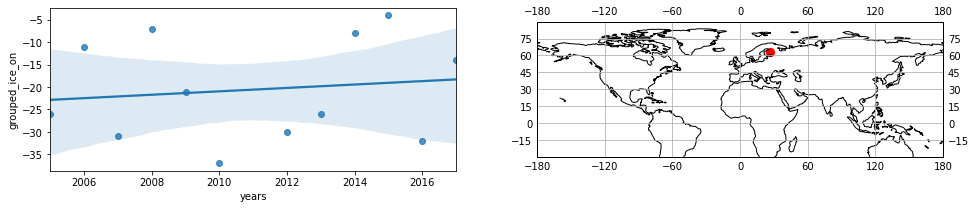

 41%|████▏     | 43/104 [00:44<01:00,  1.01it/s]

45.25_-93.75
Slope is 0.3618073593073641


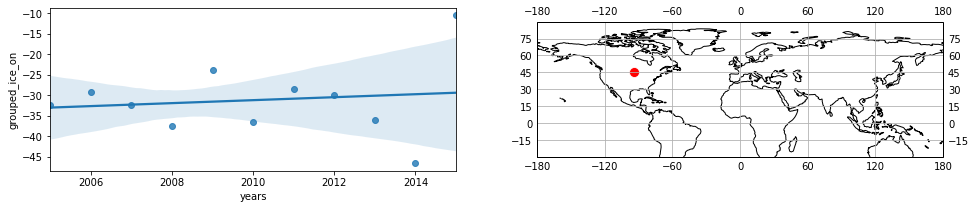

 42%|████▏     | 44/104 [00:45<00:59,  1.01it/s]

63.75_29.25
Slope is 0.3010989010989116


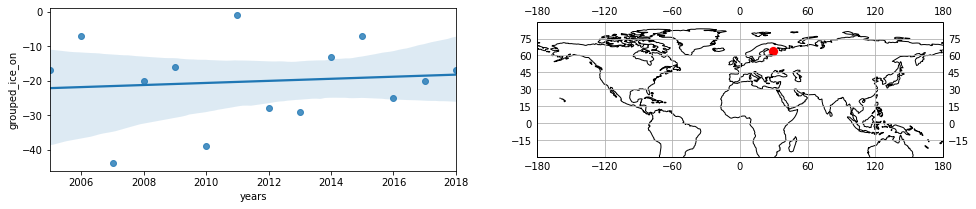

 43%|████▎     | 45/104 [00:46<00:57,  1.03it/s]

47.25_-94.75
Slope is 0.28861201727337205


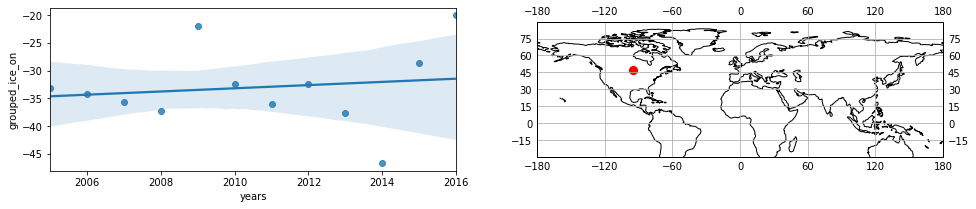

 44%|████▍     | 46/104 [00:47<00:58,  1.01s/it]

45.75_-91.75
Slope is 0.18749999999999312


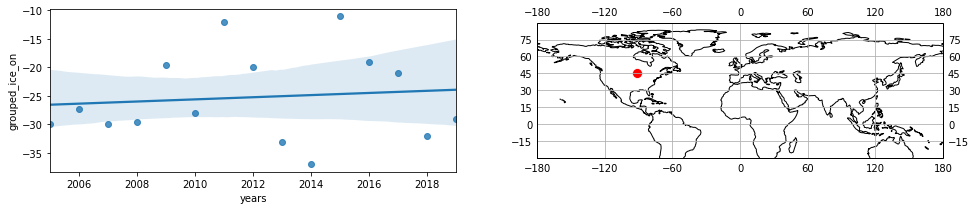

 45%|████▌     | 47/104 [00:48<01:00,  1.07s/it]

44.75_-94.25
Slope is 0.18268398268399233


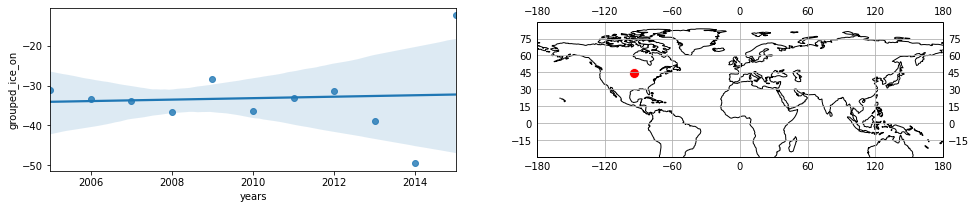

 46%|████▌     | 48/104 [00:49<00:58,  1.04s/it]

45.75_-94.25
Slope is 0.16472138972138417


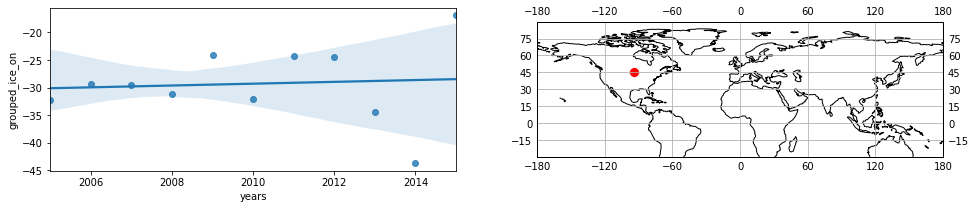

 47%|████▋     | 49/104 [00:50<00:56,  1.02s/it]

43.75_-73.75
Slope is 0.14058956916082055


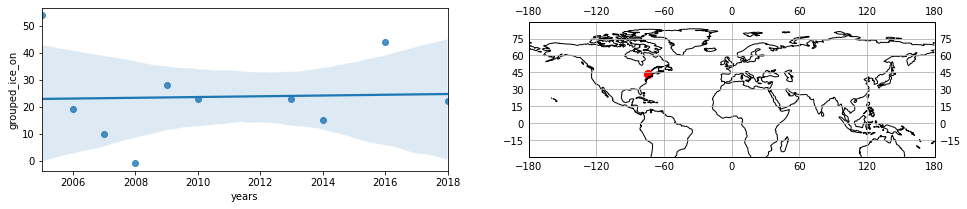

 48%|████▊     | 50/104 [00:51<00:55,  1.02s/it]

61.75_26.25
Slope is 0.1289776574136075


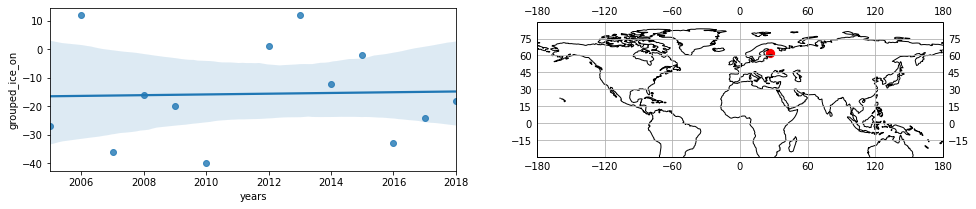

 49%|████▉     | 51/104 [00:52<00:55,  1.05s/it]

45.25_-94.75
Slope is 0.12266679399031988


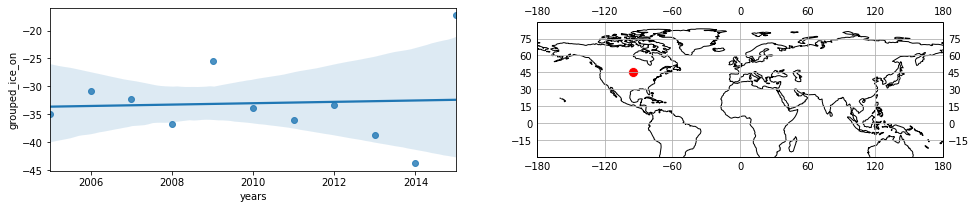

 50%|█████     | 52/104 [00:53<00:53,  1.03s/it]

42.25_-71.25
Slope is 0.0769230769228505


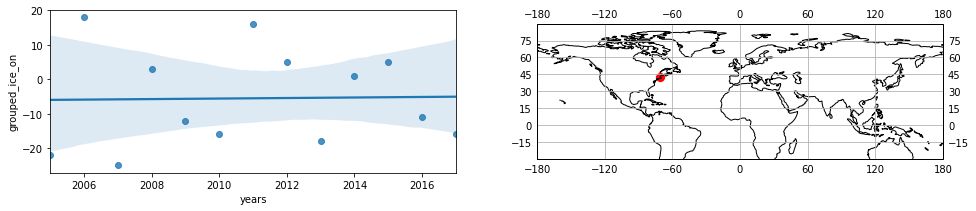

 51%|█████     | 53/104 [00:54<00:51,  1.01s/it]

45.75_-93.25
Slope is 0.047474747474747225


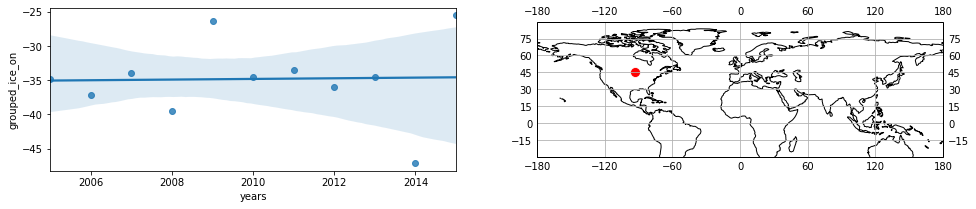

 52%|█████▏    | 54/104 [00:55<00:51,  1.02s/it]

47.75_-93.75
Slope is 0.01767714437397494


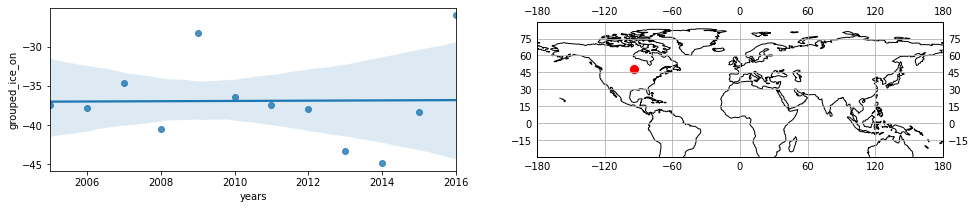

 53%|█████▎    | 55/104 [00:56<00:54,  1.11s/it]

46.75_-95.75
Slope is 0.0022581912899600765


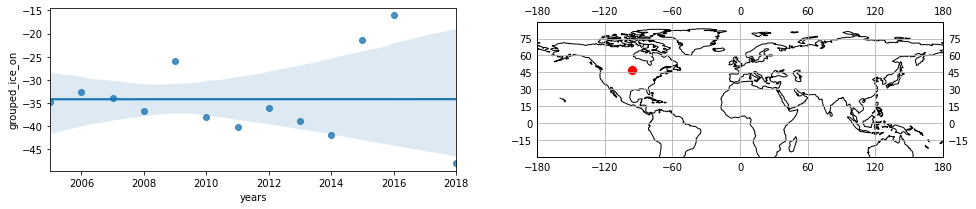

 54%|█████▍    | 56/104 [00:58<00:53,  1.11s/it]

46.75_-93.75
Slope is 0.0009906759906940232


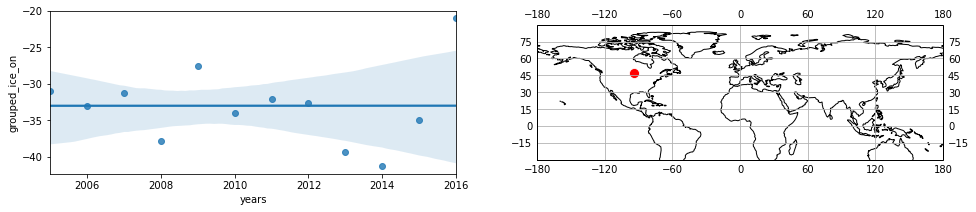

 55%|█████▍    | 57/104 [00:59<00:52,  1.12s/it]

44.25_-93.25
Slope is -0.026158730158735155


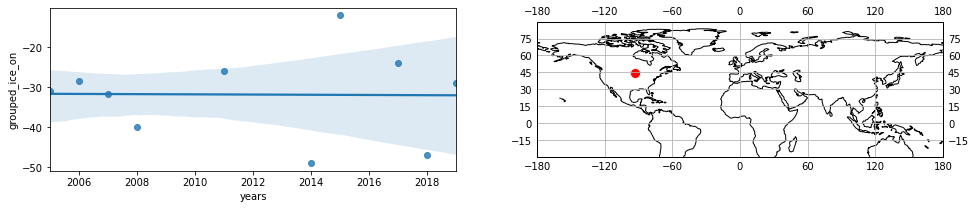

 56%|█████▌    | 58/104 [01:00<00:48,  1.06s/it]

46.75_-94.25
Slope is -0.06719769682382859


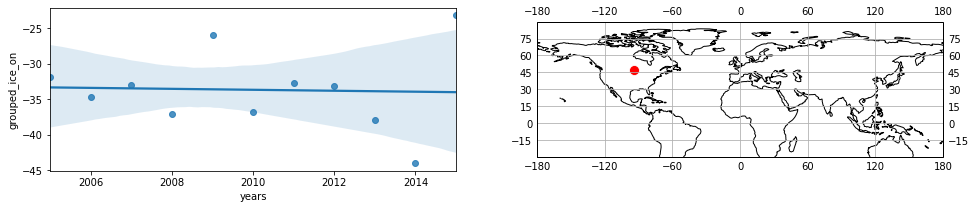

 57%|█████▋    | 59/104 [01:01<00:45,  1.02s/it]

62.75_27.25
Slope is -0.0857142857142843


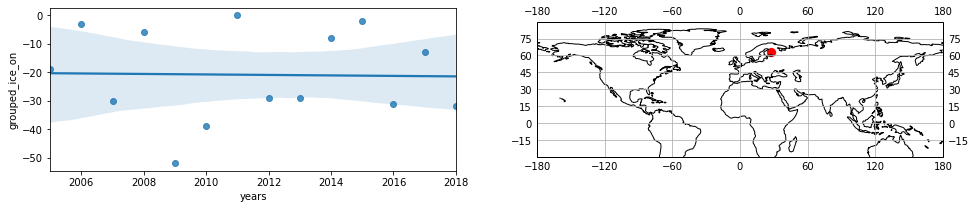

 58%|█████▊    | 60/104 [01:02<00:45,  1.02s/it]

62.75_23.25
Slope is -0.08791208791208592


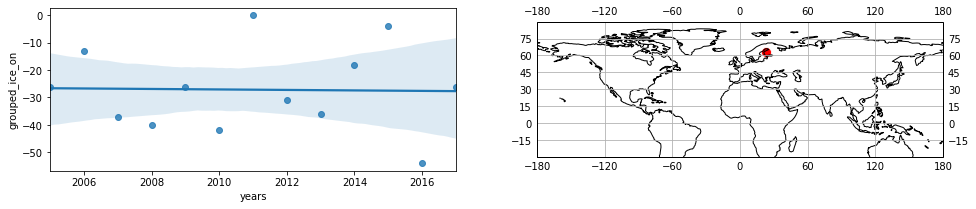

 59%|█████▊    | 61/104 [01:04<00:59,  1.38s/it]

62.25_28.75
Slope is -0.10329670329670215


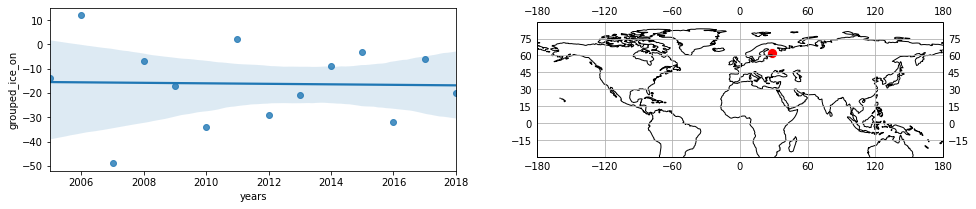

 60%|█████▉    | 62/104 [01:05<00:55,  1.32s/it]

47.25_-92.25
Slope is -0.10514069264070791


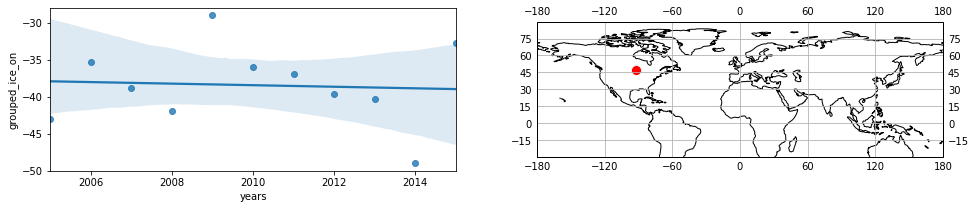

 61%|██████    | 63/104 [01:06<00:54,  1.34s/it]

47.25_-95.25
Slope is -0.15145973607963237


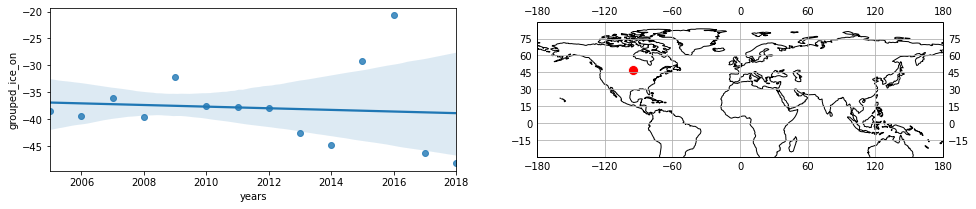

 62%|██████▏   | 64/104 [01:07<00:49,  1.24s/it]

60.25_15.75
Slope is -0.17802197802197817


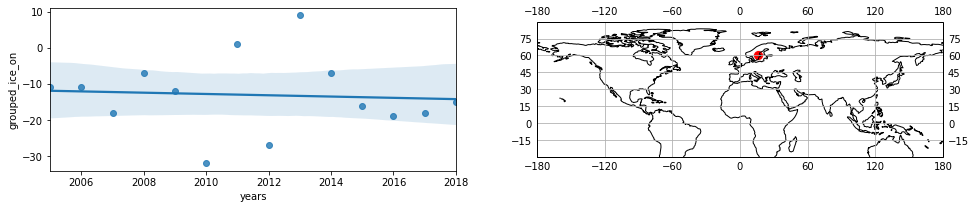

 62%|██████▎   | 65/104 [01:08<00:44,  1.14s/it]

46.25_-89.75
Slope is -0.18549450549451252


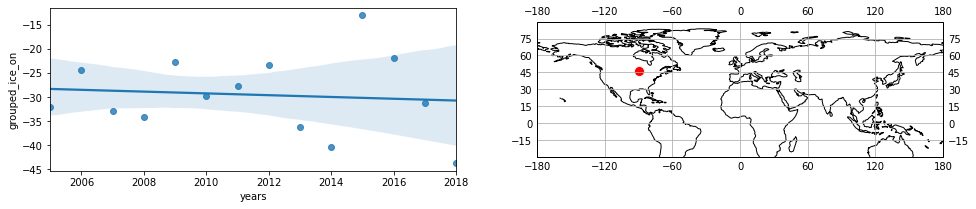

 63%|██████▎   | 66/104 [01:09<00:41,  1.09s/it]

44.25_-79.75
Slope is -0.1892857142857507


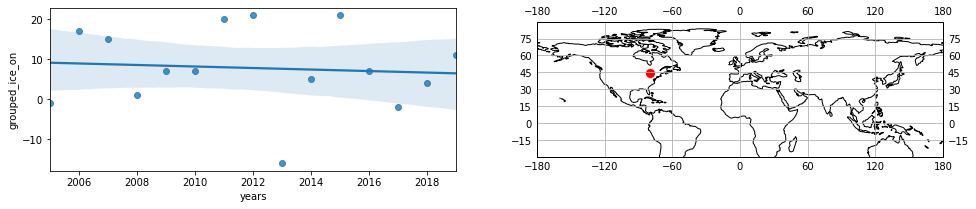

 64%|██████▍   | 67/104 [01:10<00:38,  1.04s/it]

46.25_-94.25
Slope is -0.19818181818182357


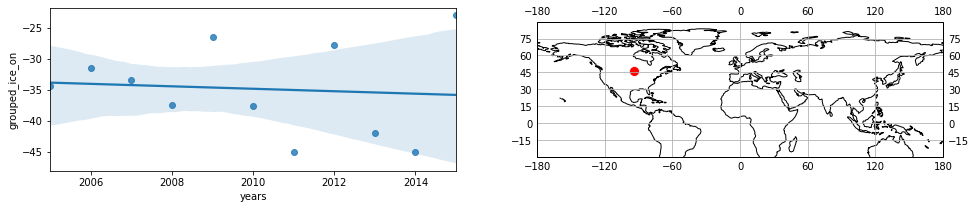

 65%|██████▌   | 68/104 [01:11<00:36,  1.02s/it]

64.25_27.75
Slope is -0.2153846153846216


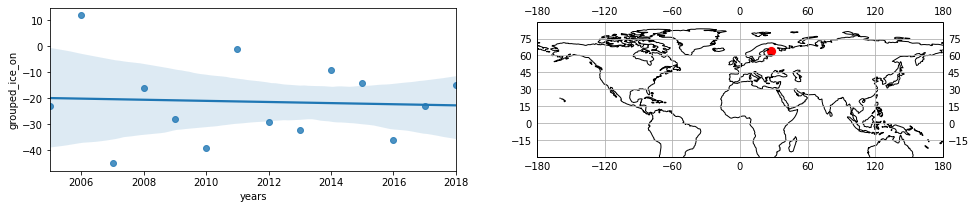

 66%|██████▋   | 69/104 [01:12<00:34,  1.01it/s]

67.75_20.75
Slope is -0.22197802197800875


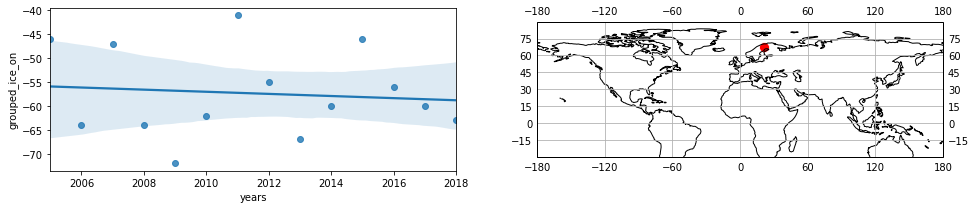

 67%|██████▋   | 70/104 [01:13<00:32,  1.06it/s]

61.75_29.25
Slope is -0.24835164835165635


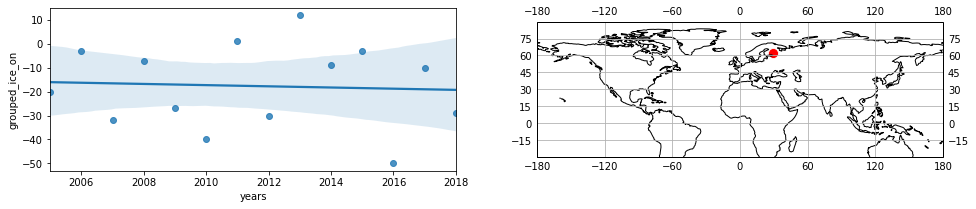

 68%|██████▊   | 71/104 [01:14<00:32,  1.00it/s]

45.75_-89.75
Slope is -0.26373626373636394


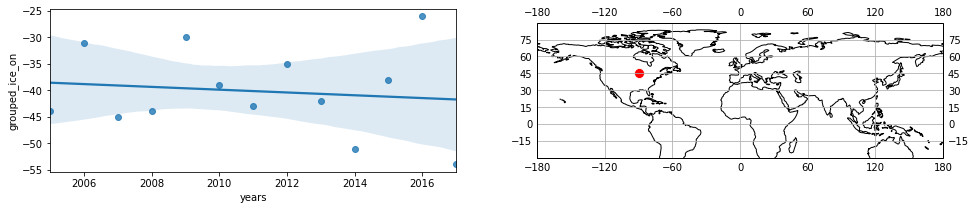

 69%|██████▉   | 72/104 [01:15<00:36,  1.13s/it]

47.25_-93.25
Slope is -0.2790687090687092


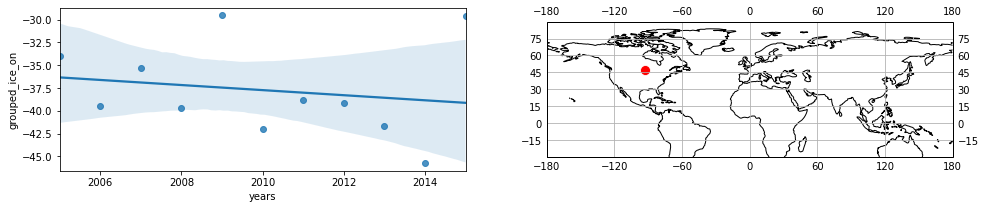

 70%|███████   | 73/104 [01:17<00:34,  1.10s/it]

61.25_14.75
Slope is -0.3030303030301795


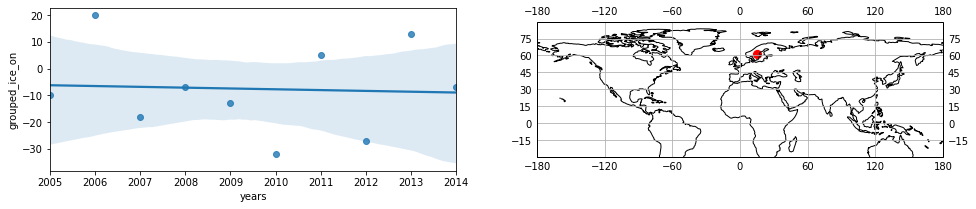

 71%|███████   | 74/104 [01:17<00:31,  1.05s/it]

63.25_26.75
Slope is -0.3662830060934597


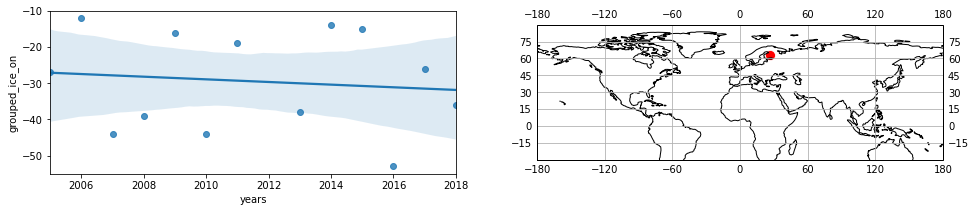

 72%|███████▏  | 75/104 [01:18<00:28,  1.00it/s]

43.75_-89.25
Slope is -0.3678571428570847


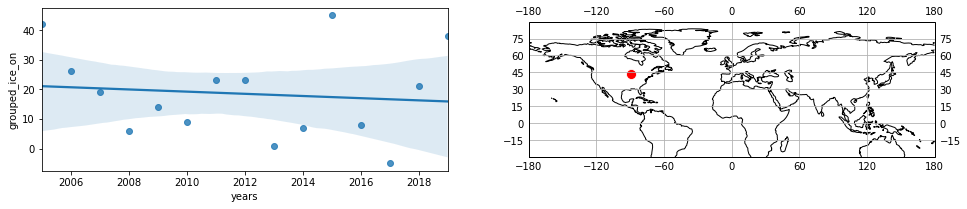

 73%|███████▎  | 76/104 [01:19<00:27,  1.03it/s]

61.25_-152.75
Slope is -0.3696969696971899


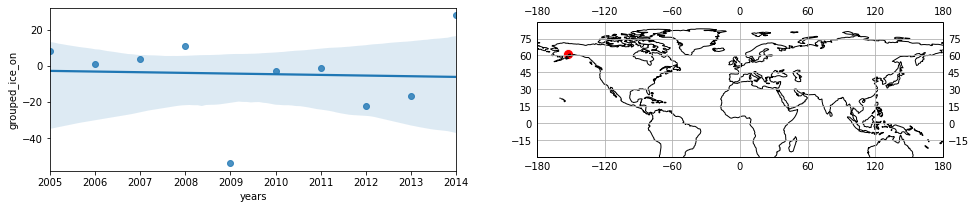

 74%|███████▍  | 77/104 [01:20<00:27,  1.03s/it]

42.25_-85.25
Slope is -0.37692307692308397


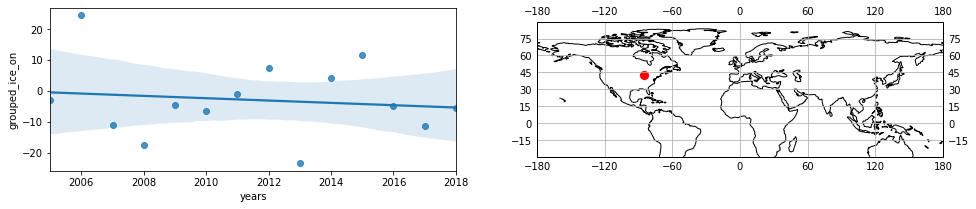

 75%|███████▌  | 78/104 [01:22<00:27,  1.07s/it]

46.75_-94.75
Slope is -0.3944797626615488


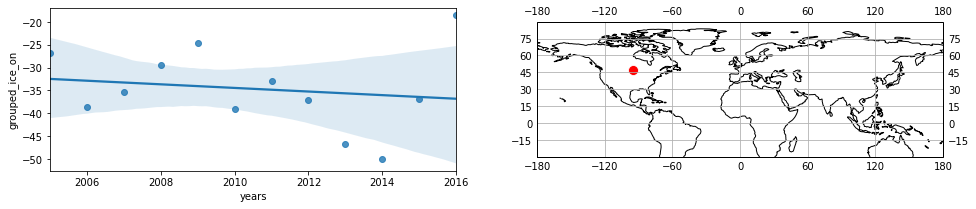

 76%|███████▌  | 79/104 [01:23<00:26,  1.04s/it]

45.25_-78.75
Slope is -0.39780219780221393


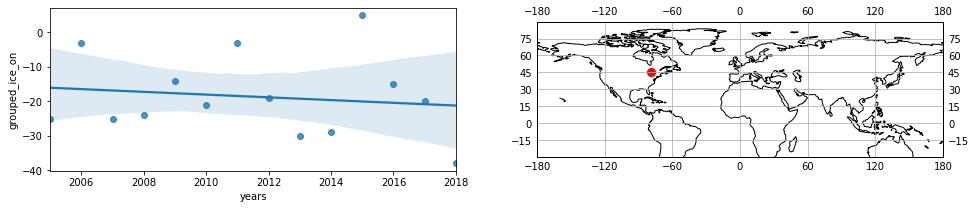

 77%|███████▋  | 80/104 [01:23<00:23,  1.02it/s]

45.25_-95.25
Slope is -0.4008417508419968


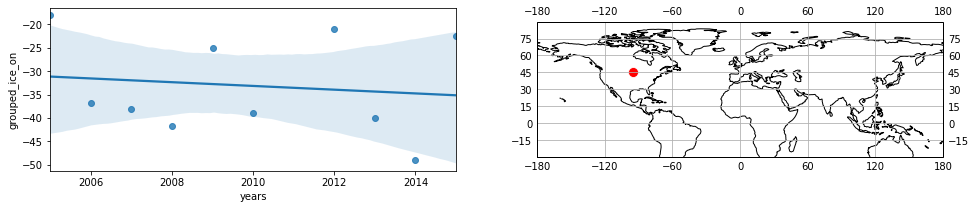

 78%|███████▊  | 81/104 [01:24<00:22,  1.04it/s]

61.25_24.25
Slope is -0.4527472527472709


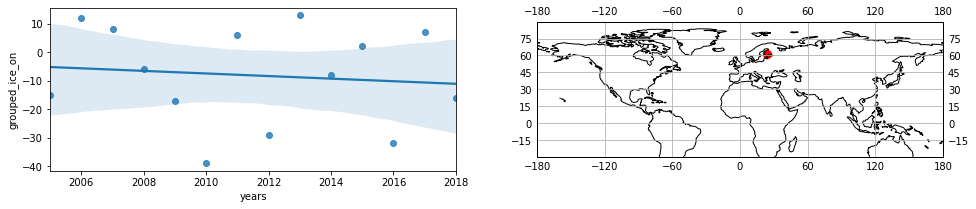

 79%|███████▉  | 82/104 [01:25<00:20,  1.05it/s]

62.75_27.75
Slope is -0.6021978021978202


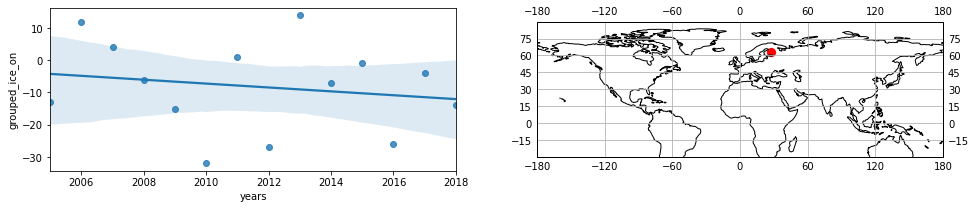

 80%|███████▉  | 83/104 [01:27<00:24,  1.15s/it]

46.75_-96.25
Slope is -0.7011019283746678


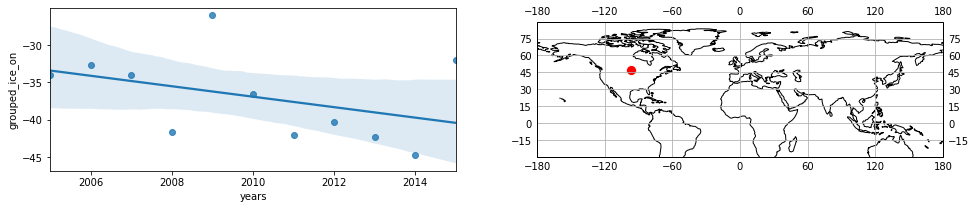

 81%|████████  | 84/104 [01:28<00:21,  1.07s/it]

61.25_-151.75
Slope is -0.7151515151512555


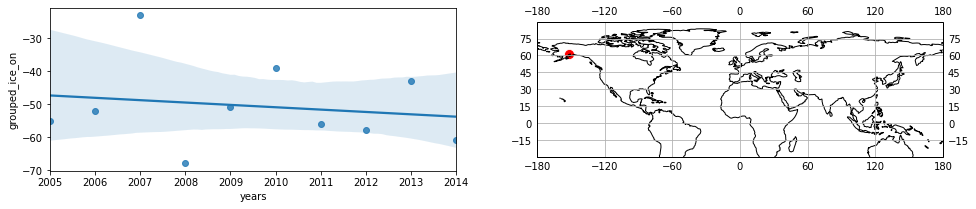

 82%|████████▏ | 85/104 [01:29<00:19,  1.02s/it]

61.75_23.75
Slope is -0.7230769230769538


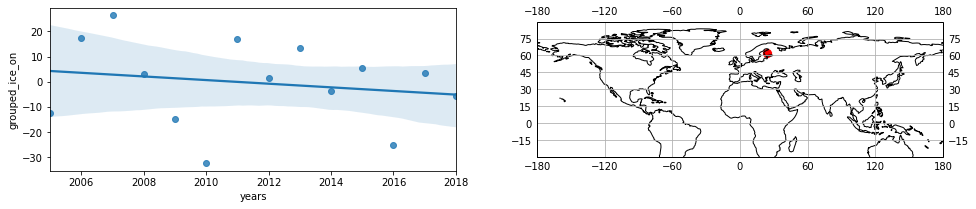

 83%|████████▎ | 86/104 [01:30<00:18,  1.01s/it]

43.25_-89.25
Slope is -0.7273809523810122


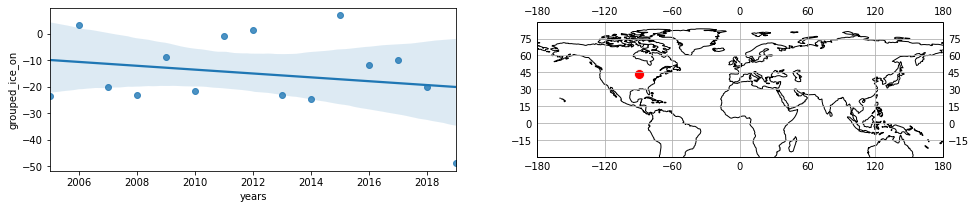

 84%|████████▎ | 87/104 [01:31<00:16,  1.01it/s]

46.75_-95.25
Slope is -0.738484848484867


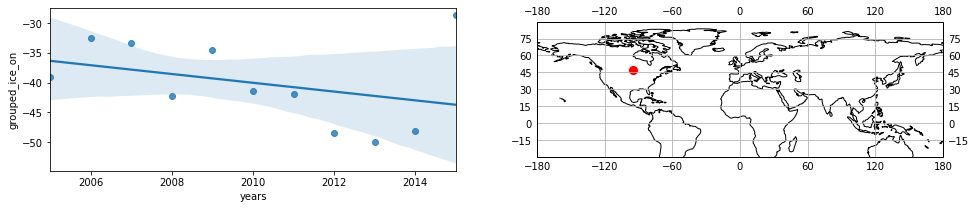

 85%|████████▍ | 88/104 [01:31<00:15,  1.05it/s]

61.25_27.75
Slope is -0.7757575757572786


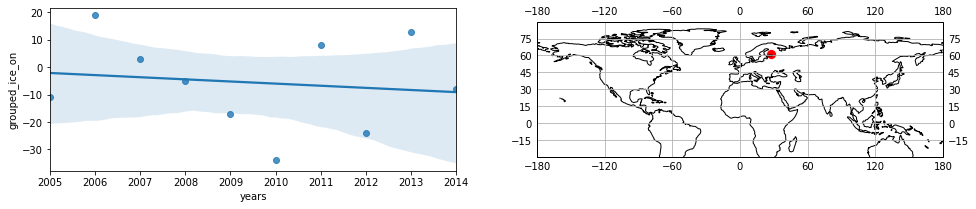

 86%|████████▌ | 89/104 [01:32<00:14,  1.02it/s]

63.75_25.25
Slope is -0.7824175824175973


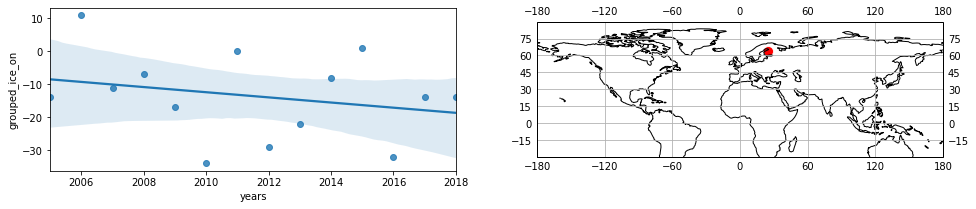

 87%|████████▋ | 90/104 [01:33<00:13,  1.05it/s]

47.75_-92.25
Slope is -0.8303030303030323


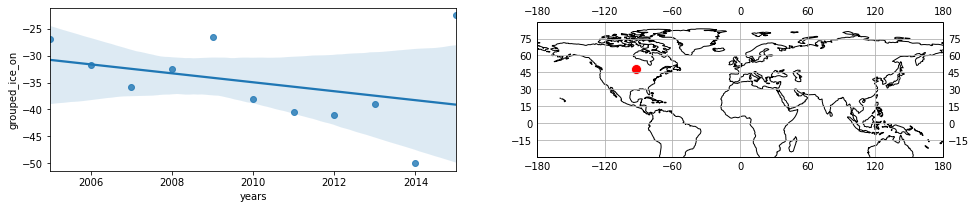

 88%|████████▊ | 91/104 [01:34<00:12,  1.06it/s]

63.75_24.75
Slope is -0.8527472527472604


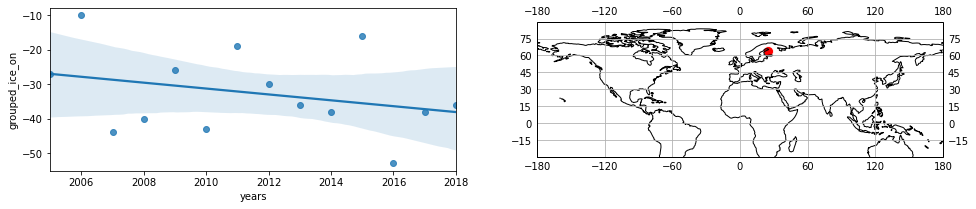

 88%|████████▊ | 92/104 [01:35<00:11,  1.05it/s]

63.25_23.75
Slope is -0.879120879120898


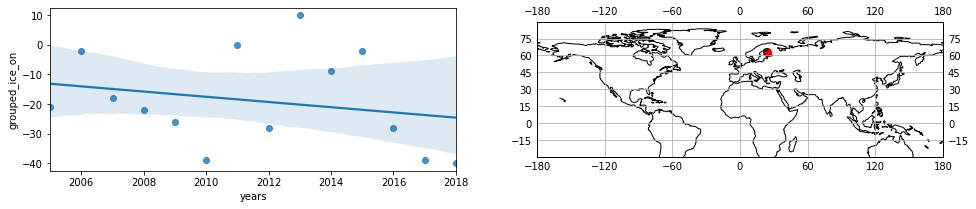

 89%|████████▉ | 93/104 [01:36<00:10,  1.07it/s]

65.75_25.75
Slope is -0.896703296703298


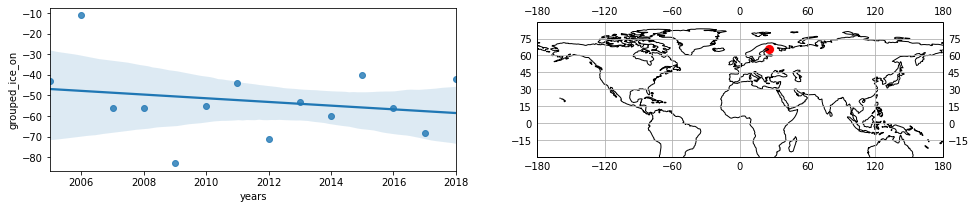

 90%|█████████ | 94/104 [01:37<00:09,  1.06it/s]

47.25_-95.75
Slope is -1.0692866161614805


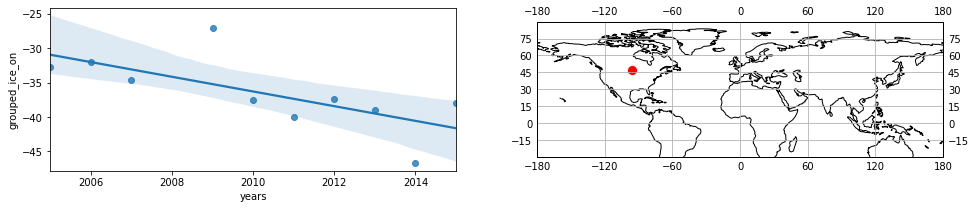

 91%|█████████▏| 95/104 [01:38<00:08,  1.09it/s]

61.25_25.75
Slope is -1.1336996336996525


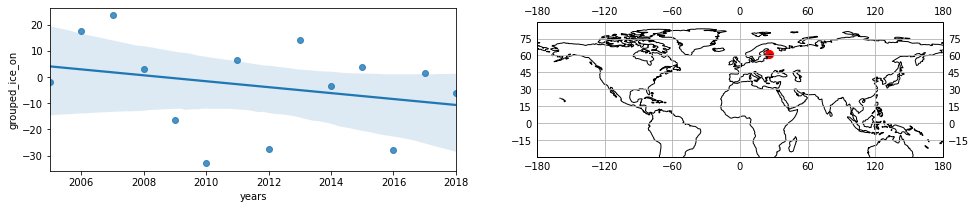

 92%|█████████▏| 96/104 [01:39<00:07,  1.07it/s]

60.75_25.75
Slope is -1.1736263736264008


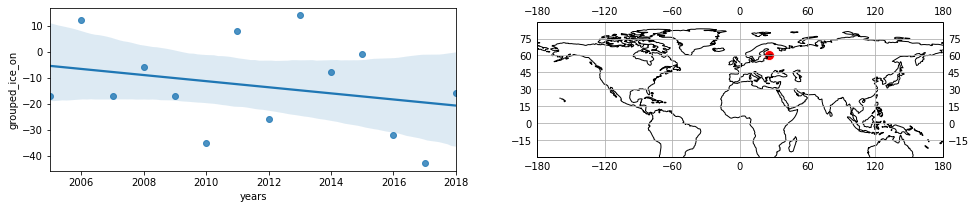

 93%|█████████▎| 97/104 [01:40<00:06,  1.09it/s]

60.75_23.75
Slope is -1.2081922816523594


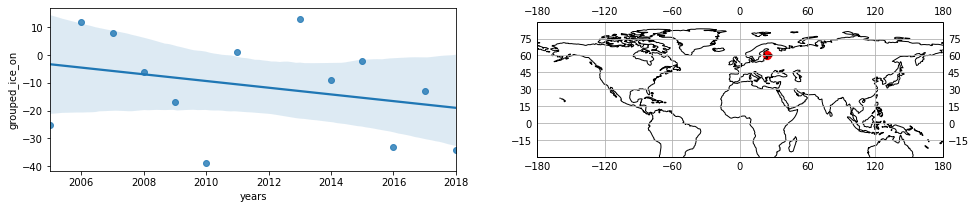

 94%|█████████▍| 98/104 [01:41<00:05,  1.06it/s]

62.25_23.75
Slope is -1.2483516483516828


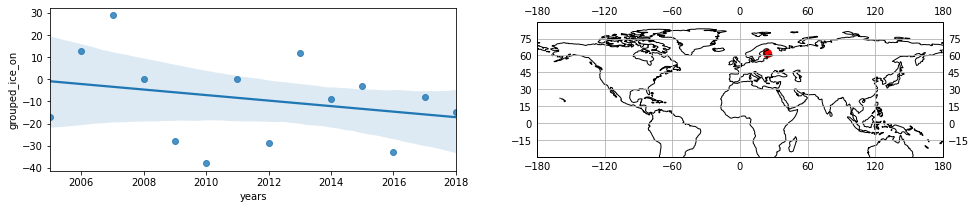

 95%|█████████▌| 99/104 [01:42<00:04,  1.04it/s]

64.25_29.75
Slope is -1.2967032967034167


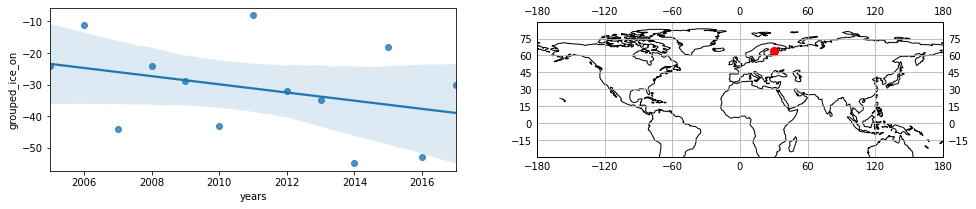

 96%|█████████▌| 100/104 [01:43<00:03,  1.04it/s]

42.75_-74.75
Slope is -1.3873581847649983


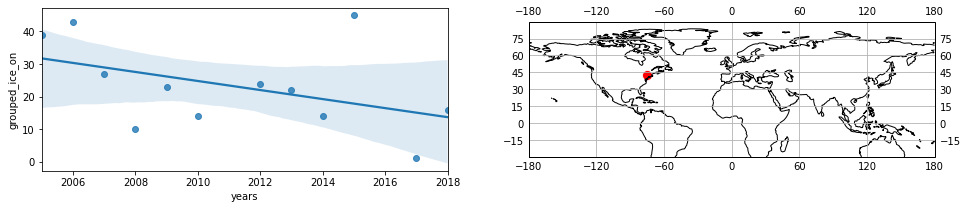

 97%|█████████▋| 101/104 [01:44<00:02,  1.05it/s]

42.75_-88.25
Slope is -1.898703403565606


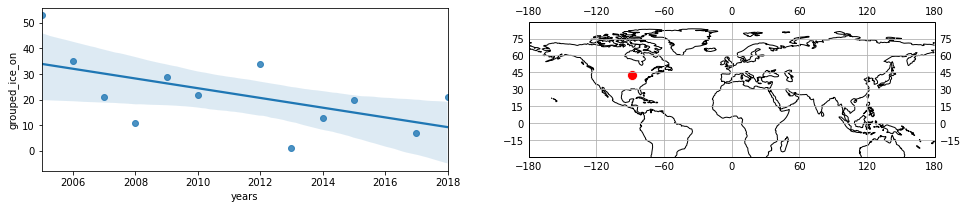

 98%|█████████▊| 102/104 [01:45<00:01,  1.03it/s]

46.75_-90.75
Slope is -1.9360019175455545


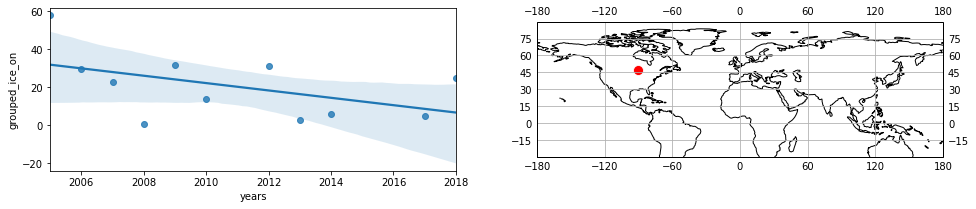

 99%|█████████▉| 103/104 [01:46<00:00,  1.02it/s]

61.25_24.75
Slope is -3.409288824383734


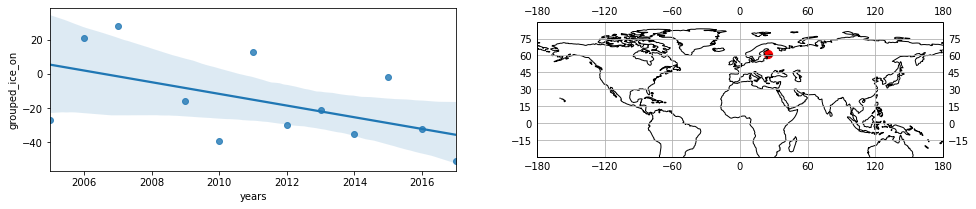

100%|██████████| 104/104 [01:47<00:00,  1.03s/it]


In [89]:
for location in tqdm(df_orig_ice_on_slopes['lat_long']):
    lat, long = location.split('_')
    
    temp_ice_on = df_after_2005_ice_on.loc[df_after_2005_ice_on['lat_long'] == location]
    temp_ice_on = temp_ice_on[['years', 'grouped_ice_on']]
    temp_ice_on.drop_duplicates(inplace=True)
    
    if len(temp_ice_on) < 10:
        continue
        
    x_cons = sm.add_constant(temp_ice_on['years'])
    model = sm.OLS(temp_ice_on['grouped_ice_on'], x_cons).fit()
    slope = model.params.values[1]
    
#     print(location)
#     print(f'Slope is {slope}')
    
#     f, axes = graph.subplots(1, 2, figsize=(16, 3)) 
    
#     sns.regplot(x = temp_ice_on['years'], y = temp_ice_on['grouped_ice_on'], ax=axes[0])   
    
#     ax2 = graph.subplot(122, projection=ccrs.PlateCarree())
#     ax2.coastlines()
#     ax2.gridlines(draw_labels=True)
#     ax2.set_extent([-180, 180, -30, 90])

#     sns.scatterplot(x = [float(long)], y = [float(lat)], transform=ccrs.PlateCarree(), color='red', s=100)

    graph.show()

In [93]:
ice_on_model_slopes = []

for location in tqdm(df_after_2005_ice_on['lat_long'].unique()):
    for lake_model in df_after_2005_ice_on['model'].unique():
        for rcp in df_after_2005_ice_on['rcp'].unique():

            temp_ice_on = df_after_2005_ice_on.loc[(df_after_2005_ice_on['model'] == lake_model) & 
                                                   (df_after_2005_ice_on['rcp'] == rcp) & 
                                                   (df_after_2005_ice_on['lat_long'] == location)]
            temp_ice_on = temp_ice_on[['years', 'grouped_icestart', 'lat_long']]
            temp_ice_on.drop_duplicates(inplace=True)

            if len(temp_ice_on) < 10:
                continue

            x_cons = sm.add_constant(temp_ice_on['years'])
            model = sm.OLS(temp_ice_on['grouped_icestart'], x_cons).fit()
            slope = model.params.values[1]
#             lower_95 = model.conf_int()[0][1]
#             upper_95 = model.conf_int()[1][1]
#             standard_dev = model.bse.values[1]
            
            mean = temp_ice_on['grouped_icestart'].mean() # mean
            cov = stats.variation(temp_ice_on['grouped_icestart']) # cov
            start_year = 2005

#             ice_on_model_slopes.append(['ice_on', lake_model, rcp, slope, lower_95, upper_95, standard_dev])
            ice_on_model_slopes.append([location, len(temp_ice_on), 'ice_on', lake_model, rcp, mean, slope, cov])

 94%|█████████▍| 197/209 [05:02<00:21,  1.81s/it]/home/arshad/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1072: RuntimeWarning: divide by zero encountered in double_scalars
  return a.std(axis) / a.mean(axis)
100%|██████████| 209/209 [05:24<00:00,  1.55s/it]


In [94]:
df_ice_on_models = pd.DataFrame(ice_on_model_slopes, 
                                columns = ['lat_long', 'len_data_models', 'variable', 'lake_model', 'rcp', 
                                           'mean_model', 'slope_model', 'cov_model'])
display(df_ice_on_models.head())

lat_long  len_data_models variable       lake_model  rcp  mean_model  \
0  69.25_20.75               14   ice_on  albm_gfdl-esm2m   26  -55.642857   
1  69.25_20.75               14   ice_on  albm_gfdl-esm2m   60  -58.642857   
2  69.25_20.75               14   ice_on  albm_gfdl-esm2m   85  -58.428571   
3  69.25_20.75               14   ice_on  albm_hadgem2-es   26  -57.642857   
4  69.25_20.75               14   ice_on  albm_hadgem2-es   60  -55.000000   

   slope_model  cov_model  
0     1.026374  -0.153642  
1     0.375824  -0.108350  
2     0.865934  -0.109343  
3    -0.969231  -0.111586  
4     0.184615  -0.112920

In [95]:
df_ice_on_slopes = df_ice_on_models.merge(df_orig_ice_on_slopes)
display(df_ice_on_slopes)

df_ice_on_slopes.to_csv('/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/Analysis/ice_on_slopes_may_20.csv', 
                        index=False)

lat_long  len_data_models variable         lake_model  rcp  \
0      69.25_20.75               14   ice_on    albm_gfdl-esm2m   26   
1      69.25_20.75               14   ice_on    albm_gfdl-esm2m   60   
2      69.25_20.75               14   ice_on    albm_gfdl-esm2m   85   
3      69.25_20.75               14   ice_on    albm_hadgem2-es   26   
4      69.25_20.75               14   ice_on    albm_hadgem2-es   60   
...            ...              ...      ...                ...  ...   
4596  42.25_-85.25               14   ice_on  lake_ipsl-cm5a-lr   26   
4597  42.25_-85.25               14   ice_on  lake_ipsl-cm5a-lr   60   
4598  42.25_-85.25               14   ice_on  lake_ipsl-cm5a-lr   85   
4599  42.25_-85.25               13   ice_on        lake_miroc5   26   
4600  42.25_-85.25               14   ice_on        lake_miroc5   60   

      mean_model  slope_model  cov_model  len_in_situ_data  start_year  \
0     -55.642857     1.026374  -0.153642                14        2005   
1     -58.642857     0.375824  -0.108350                14        2005   
2     -58.428571     0.865934  -0.109343                14        2005   
3     -57.642857    -0.969231  -0.111586                14        2005   
4     -55.000000     0.184615  -0.112920                14        2005   
...          ...          ...        ...               ...         ...   
4596  -10.928571     0.657143  -1.198291                14        2005   
4597   -8.285714    -0.826374  -1.950030                14        2005   
4598  -10.571429     0.672527  -1.563660                14        2005   
4599  -11.615385     1.549451  -1.511501                14        2005   
4600  -10.571429     0.254945  -1.167727                14        2005   

      mean_in_situ  slope_in_situ  cov_in_situ  
0       -44.142857       0.628571    -0.209533  
1       -44.142857       0.628571    -0.209533  
2       -44.142857       0.628571    -0.209533  
3       -44.142857       0.628571    -0.209533  
4       -44.142857       0.628571    -0.209533  
...            ...            ...          ...  
4596     -2.964286      -0.376923    -3.951899  
4597     -2.964286      -0.376923    -3.951899  
4598     -2.964286      -0.376923    -3.951899  
4599     -2.964286      -0.376923    -3.951899  
4600     -2.964286      -0.376923    -3.951899  

[4601 rows x 13 columns]

In [96]:
orig_ice_off_slopes = []
for location in tqdm(df_after_2005_ice_off['lat_long'].unique()):
    temp_ice_off = df_after_2005_ice_off.loc[df_after_2005_ice_off['lat_long'] == location]
    temp_ice_off = temp_ice_off[['years', 'grouped_ice_off']]
    temp_ice_off.drop_duplicates(inplace=True)
    
    if len(temp_ice_off) < 10:
        continue

    x_cons = sm.add_constant(temp_ice_off['years'])
    model = sm.OLS(temp_ice_off['grouped_ice_off'], x_cons).fit()
    slope = model.params.values[1]
   
    mean = temp_ice_off['grouped_ice_off'].mean() # mean
    cov = stats.variation(temp_ice_off['grouped_ice_off']) # cov
    start_year = 2005
    
    orig_ice_off_slopes.append([location, len(temp_ice_off), 'ice_off', start_year, mean, slope, cov])

100%|██████████| 270/270 [00:11<00:00, 23.68it/s]


In [97]:
df_orig_ice_off_slopes = pd.DataFrame(orig_ice_off_slopes, 
                                columns = ['lat_long', 'len_in_situ_data', 'variable', 'start_year', 
                                           'mean_in_situ', 'slope_in_situ', 'cov_in_situ'])
display(df_orig_ice_off_slopes.head())

lat_long  len_in_situ_data variable  start_year  mean_in_situ  \
0  69.25_20.75                14  ice_off        2005    163.285714   
1  69.25_26.75                14  ice_off        2005    148.285714   
2  68.75_28.25                14  ice_off        2005    142.428571   
3  68.25_23.75                14  ice_off        2005    144.785714   
4  67.75_20.75                12  ice_off        2005    147.500000   

   slope_in_situ  cov_in_situ  
0      -0.246154     0.045444  
1      -0.294505     0.047986  
2       0.039560     0.056960  
3      -0.806593     0.068928  
4      -0.050657     0.040061

In [98]:
ice_off_model_slopes = []

for location in tqdm(df_after_2005_ice_off['lat_long'].unique()):
    for lake_model in df_after_2005_ice_off['model'].unique():
        for rcp in df_after_2005_ice_off['rcp'].unique():

            temp_ice_off = df_after_2005_ice_off.loc[(df_after_2005_ice_off['model'] == lake_model) & 
                                                   (df_after_2005_ice_off['rcp'] == rcp) & 
                                                   (df_after_2005_ice_off['lat_long'] == location)]
            temp_ice_off = temp_ice_off[['years', 'grouped_iceend', 'lat_long']]
            temp_ice_off.drop_duplicates(inplace=True)

            if len(temp_ice_off) < 10:
                continue

            x_cons = sm.add_constant(temp_ice_off['years'])
            model = sm.OLS(temp_ice_off['grouped_iceend'], x_cons).fit()
            slope = model.params.values[1]
#             lower_95 = model.conf_int()[0][1]
#             upper_95 = model.conf_int()[1][1]
#             standard_dev = model.bse.values[1]

            mean = temp_ice_off['grouped_iceend'].mean() # mean
            cov = stats.variation(temp_ice_off['grouped_iceend']) # cov
            start_year = 2005

#             ice_off_model_slopes.append(['ice_off', lake_model, rcp, slope, lower_95, upper_95, standard_dev])
            ice_off_model_slopes.append([location, len(temp_ice_off), 'ice_off', lake_model, rcp, mean, slope, cov])

100%|██████████| 270/270 [08:55<00:00,  1.98s/it]


In [100]:
df_ice_off_models = pd.DataFrame(ice_off_model_slopes, 
                                columns = ['lat_long', 'len_data_models', 'variable', 'lake_model', 'rcp', 
                                           'mean_model', 'slope_model', 'cov_model'])
display(df_ice_off_models.head())

lat_long  len_data_models variable       lake_model  rcp  mean_model  \
0  69.25_20.75               14  ice_off  albm_gfdl-esm2m   26  193.857143   
1  69.25_20.75               14  ice_off  albm_gfdl-esm2m   60  193.928571   
2  69.25_20.75               14  ice_off  albm_gfdl-esm2m   85  195.285714   
3  69.25_20.75               14  ice_off  albm_hadgem2-es   26  193.214286   
4  69.25_20.75               14  ice_off  albm_hadgem2-es   60  186.214286   

   slope_model  cov_model  
0    -0.756044   0.026075  
1    -0.301099   0.016127  
2    -0.202198   0.019588  
3     0.626374   0.031432  
4     0.063736   0.028211

In [101]:
df_ice_off_slopes = df_ice_off_models.merge(df_orig_ice_off_slopes)
display(df_ice_off_slopes)

df_ice_off_slopes.to_csv('/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/Analysis/ice_off_slopes_may_20.csv', 
                        index=False)

lat_long  len_data_models variable         lake_model  rcp  \
0      69.25_20.75               14  ice_off    albm_gfdl-esm2m   26   
1      69.25_20.75               14  ice_off    albm_gfdl-esm2m   60   
2      69.25_20.75               14  ice_off    albm_gfdl-esm2m   85   
3      69.25_20.75               14  ice_off    albm_hadgem2-es   26   
4      69.25_20.75               14  ice_off    albm_hadgem2-es   60   
...            ...              ...      ...                ...  ...   
6483  42.25_-85.25               14  ice_off  lake_ipsl-cm5a-lr   26   
6484  42.25_-85.25               14  ice_off  lake_ipsl-cm5a-lr   60   
6485  42.25_-85.25               14  ice_off  lake_ipsl-cm5a-lr   85   
6486  42.25_-85.25               13  ice_off        lake_miroc5   26   
6487  42.25_-85.25               14  ice_off        lake_miroc5   60   

      mean_model  slope_model  cov_model  len_in_situ_data  start_year  \
0     193.857143    -0.756044   0.026075                14        2005   
1     193.928571    -0.301099   0.016127                14        2005   
2     195.285714    -0.202198   0.019588                14        2005   
3     193.214286     0.626374   0.031432                14        2005   
4     186.214286     0.063736   0.028211                14        2005   
...          ...          ...        ...               ...         ...   
6483  108.071429    -0.507692   0.086340                14        2005   
6484  103.428571    -0.246154   0.135246                14        2005   
6485   98.857143    -0.364835   0.144473                14        2005   
6486   95.615385    -2.412088   0.168067                14        2005   
6487  101.214286     0.103297   0.126260                14        2005   

      mean_in_situ  slope_in_situ  cov_in_situ  
0       163.285714      -0.246154     0.045444  
1       163.285714      -0.246154     0.045444  
2       163.285714      -0.246154     0.045444  
3       163.285714      -0.246154     0.045444  
4       163.285714      -0.246154     0.045444  
...            ...            ...          ...  
6483     53.821429      -0.354945     0.476741  
6484     53.821429      -0.354945     0.476741  
6485     53.821429      -0.354945     0.476741  
6486     53.821429      -0.354945     0.476741  
6487     53.821429      -0.354945     0.476741  

[6488 rows x 13 columns]

In [89]:
df_ice_off_slopes['diff'] = df_ice_off_slopes['slope_in_situ'] - df_ice_off_slopes['slope_model']

In [1]:
graph.figure(figsize=(9, 16))
graph.title('Ice Off slopes')
sns.boxplot(y='lake_model', x='slope_model', hue = 'rcp', data=df_ice_off_slopes)

graph.axvline(df_orig_ice_off_slopes['slope_in_situ'].quantile(0.025), linestyle='--', color='red')
graph.axvline(df_orig_ice_off_slopes['slope_in_situ'].quantile(0.975), linestyle='--', color='red')
graph.axvline(df_orig_ice_off_slopes['slope_in_situ'].mean(), linewidth=4, color='blue', linestyle='dashdot')
graph.show()

NameError: name 'graph' is not defined

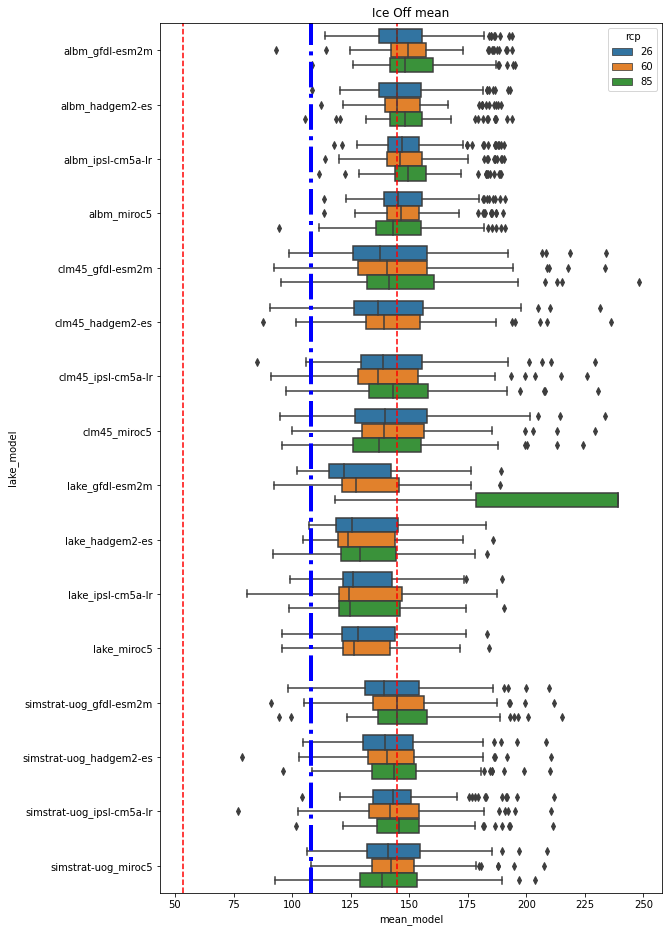

In [122]:
graph.figure(figsize=(9, 16))
graph.title('Ice Off mean')
sns.boxplot(y='lake_model', x='mean_model', hue = 'rcp', data=df_ice_off_slopes)

graph.axvline(df_orig_ice_off_slopes['mean_in_situ'].quantile(0.025), linestyle='--', color='red')
graph.axvline(df_orig_ice_off_slopes['mean_in_situ'].quantile(0.975), linestyle='--', color='red')
graph.axvline(df_orig_ice_off_slopes['mean_in_situ'].mean(), linewidth=4, color='blue', linestyle='dashdot')
graph.show()

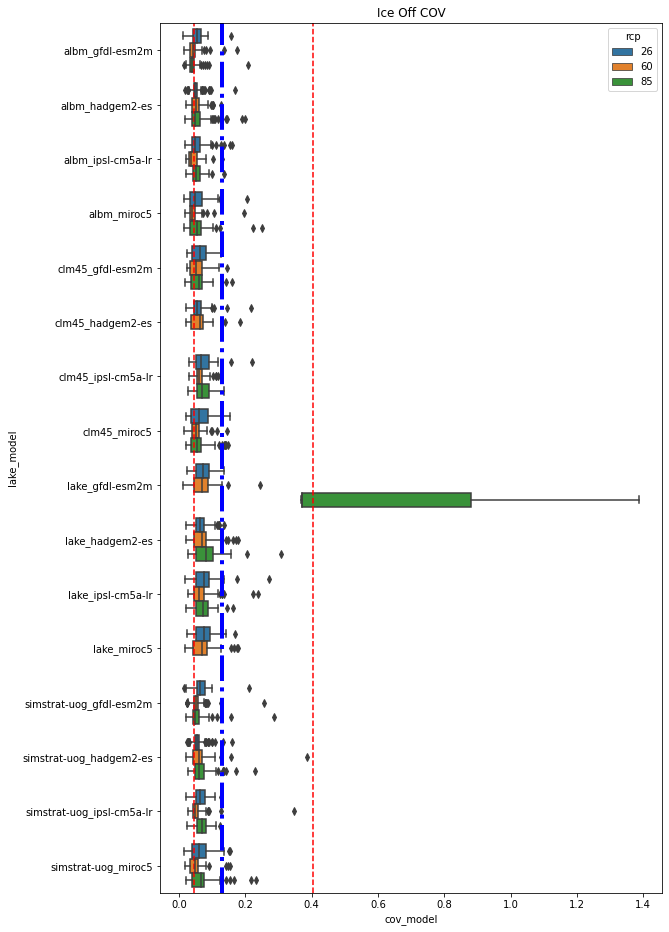

In [123]:
graph.figure(figsize=(9, 16))
graph.title('Ice Off COV')
sns.boxplot(y='lake_model', x='cov_model', hue = 'rcp', data=df_ice_off_slopes)

graph.axvline(df_orig_ice_off_slopes['cov_in_situ'].quantile(0.025), linestyle='--', color='red')
graph.axvline(df_orig_ice_off_slopes['cov_in_situ'].quantile(0.975), linestyle='--', color='red')
graph.axvline(df_orig_ice_off_slopes['cov_in_situ'].mean(), linewidth=4, color='blue', linestyle='dashdot')
graph.show()

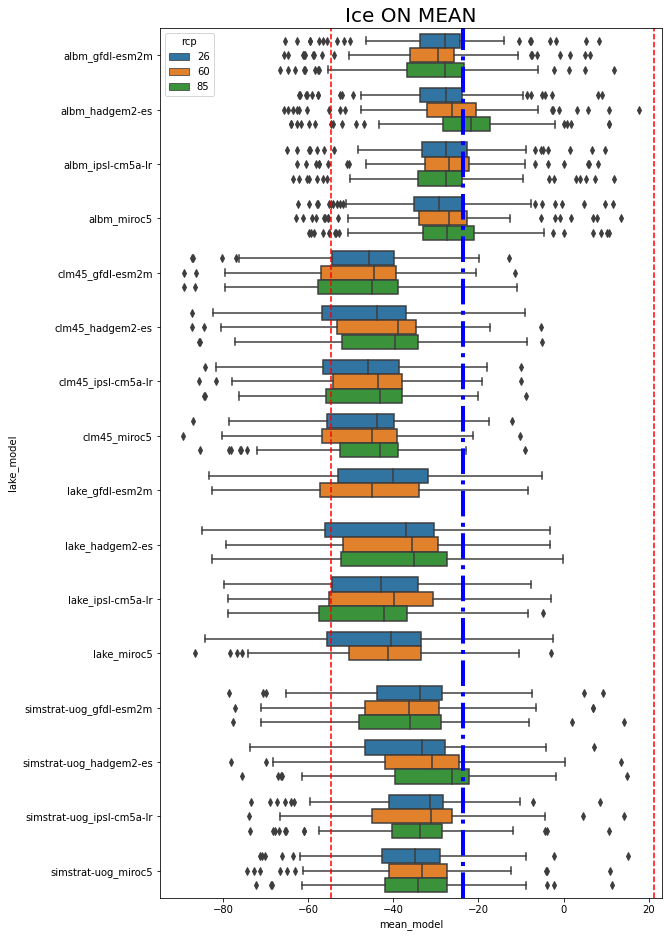

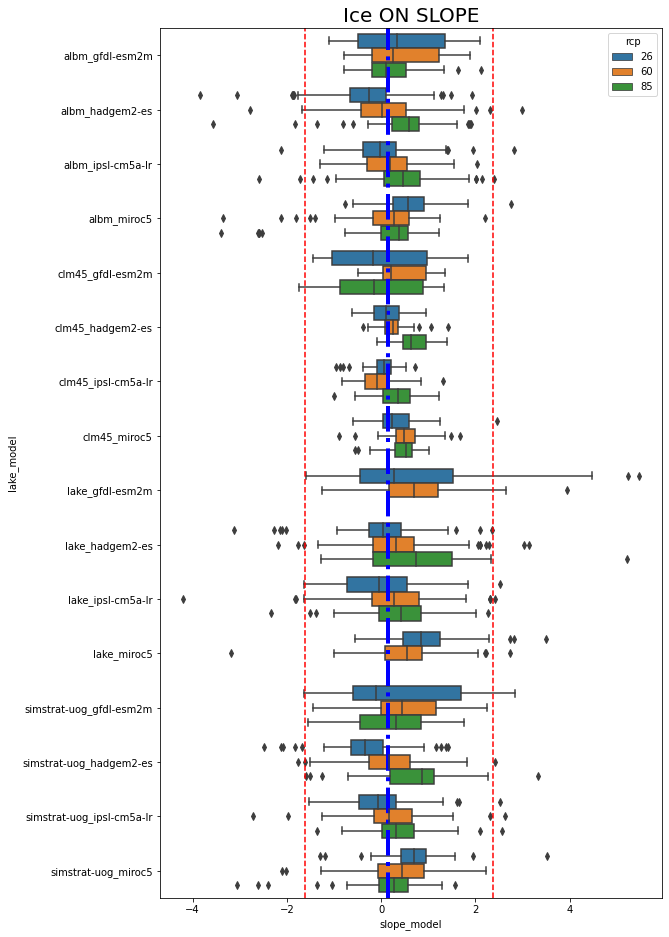

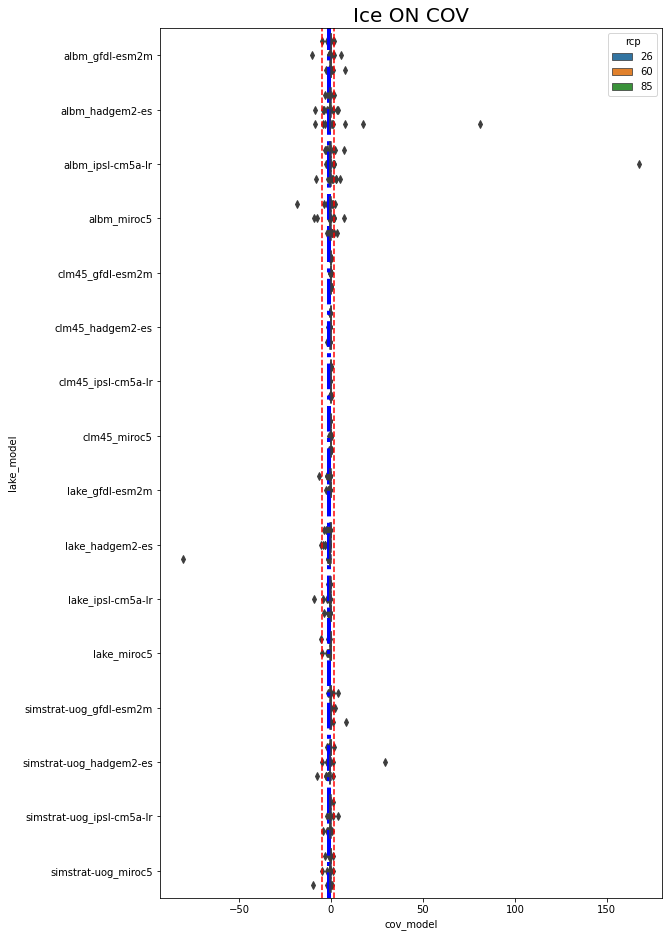

In [124]:
# Mean
graph.figure(figsize=(9, 16))
graph.title('Ice ON MEAN', fontsize=20)
sns.boxplot(y='lake_model', x='mean_model', hue = 'rcp', data=df_ice_on_slopes)

graph.axvline(df_orig_ice_on_slopes['mean_in_situ'].quantile(0.025), linestyle='--', color='red')
graph.axvline(df_orig_ice_on_slopes['mean_in_situ'].quantile(0.975), linestyle='--', color='red')
graph.axvline(df_orig_ice_on_slopes['mean_in_situ'].mean(), linewidth=4, color='blue', linestyle='dashdot')
graph.show()

# Slope
graph.figure(figsize=(9, 16))
graph.title('Ice ON SLOPE', fontsize=20)
sns.boxplot(y='lake_model', x='slope_model', hue = 'rcp', data=df_ice_on_slopes)

graph.axvline(df_orig_ice_on_slopes['slope_in_situ'].quantile(0.025), linestyle='--', color='red')
graph.axvline(df_orig_ice_on_slopes['slope_in_situ'].quantile(0.975), linestyle='--', color='red')
graph.axvline(df_orig_ice_on_slopes['slope_in_situ'].mean(), linewidth=4, color='blue', linestyle='dashdot')
graph.show()

# COV
graph.figure(figsize=(9, 16))
graph.title('Ice ON COV', fontsize=20)
sns.boxplot(y='lake_model', x='cov_model', hue = 'rcp', data=df_ice_on_slopes)

graph.axvline(df_orig_ice_on_slopes['cov_in_situ'].quantile(0.025), linestyle='--', color='red')
graph.axvline(df_orig_ice_on_slopes['cov_in_situ'].quantile(0.975), linestyle='--', color='red')
graph.axvline(df_orig_ice_on_slopes['cov_in_situ'].mean(), linewidth=4, color='blue', linestyle='dashdot')
graph.show()

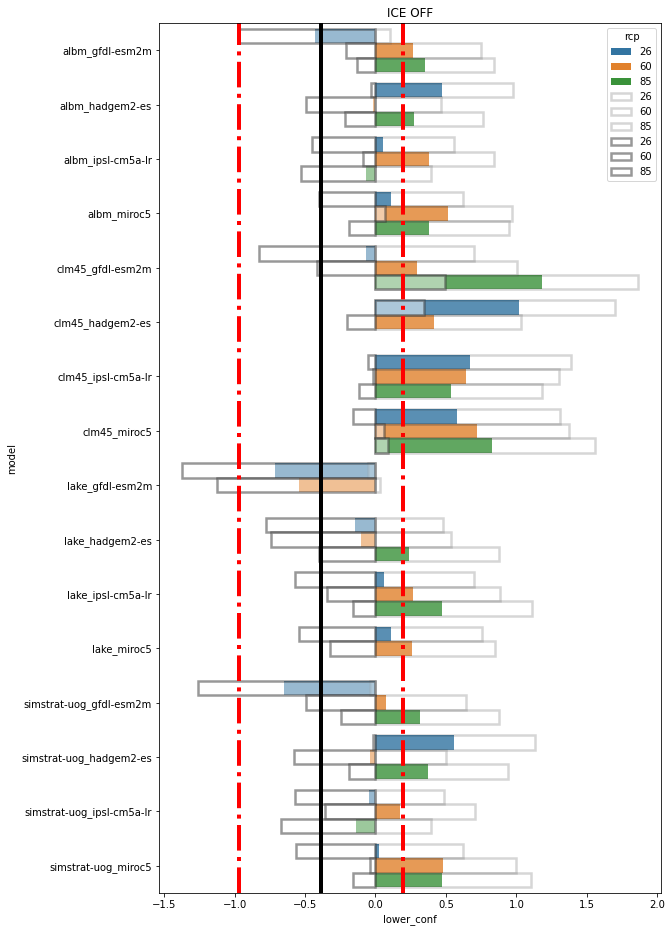

In [53]:
graph.figure(figsize=(9, 16))

graph.title('ICE OFF')
sns.barplot(y="model", x="slope", data=slopes_df_ice_off, hue='rcp')
sns.barplot(y="model", x="upper_conf", data=slopes_df_ice_off, hue='rcp', alpha=0.2, 
            linewidth=2.5, edgecolor=".2", facecolor=(1,1,1,0))
sns.barplot(y="model", x="lower_conf", data=slopes_df_ice_off, hue='rcp', alpha=0.5, 
            linewidth=2.5, edgecolor=".2", facecolor='white')

graph.axvline(orig_ice_off_slope[3], linewidth=4, color='black')
graph.axvline(orig_ice_off_slope[4], linestyle = 'dashdot', color='red', linewidth=4,)
graph.axvline(orig_ice_off_slope[5], linestyle = 'dashdot', color='red', linewidth=4,)
# graph.fill_betweenx(y = 0, x1=orig_ice_off_slope[4], x2=orig_ice_off_slope[5])
graph.show()

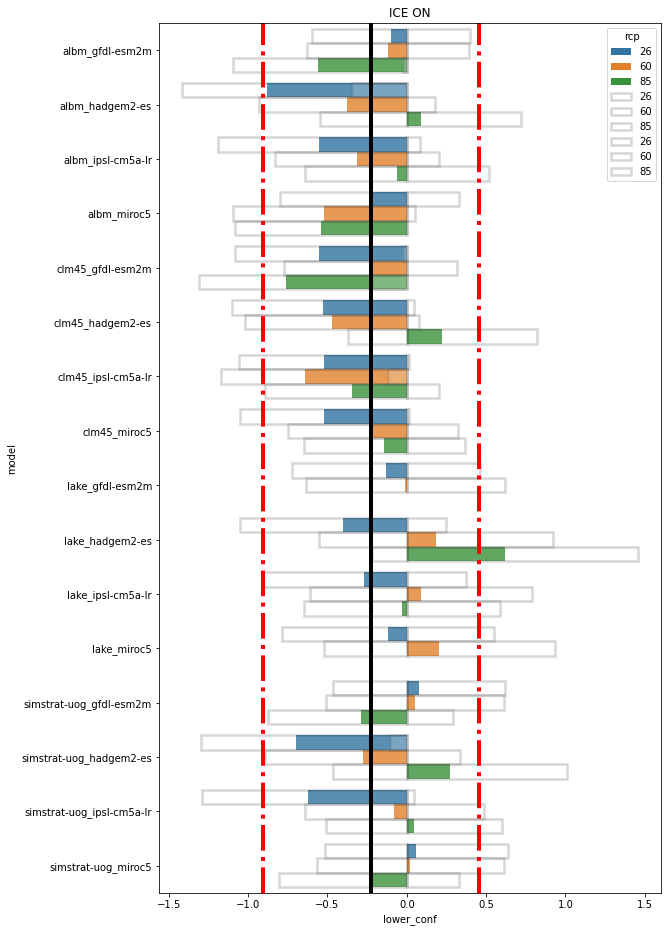

In [42]:
graph.figure(figsize=(9, 16))
graph.title('ICE ON')
sns.barplot(y="model", x="slope", data=slopes_df_ice_on, hue='rcp')
sns.barplot(y="model", x="upper_conf", data=slopes_df_ice_on, hue='rcp', alpha=0.2, 
            linewidth=2.5, edgecolor=".2", facecolor=(1,1,1,0))
sns.barplot(y="model", x="lower_conf", data=slopes_df_ice_on, hue='rcp', alpha=0.2, 
            linewidth=2.5, edgecolor=".2", facecolor=(1,1,1,0))

graph.axvline(orig_ice_on_slope[3], linewidth=4, color='black')
graph.axvline(orig_ice_on_slope[4], linestyle = 'dashdot', color='red', linewidth=4,)
graph.axvline(orig_ice_on_slope[5], linestyle = 'dashdot', color='red', linewidth=4,)
graph.show()

# Time series of specific locations

In [103]:
kevin = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/all_lakes_ts_minimal_KB_Aug31.csv')
kevin = kevin[['start_year', 'froze', 'froze_1', 'ice_on_1', 'ice_off_1', 'orig_duration', 'orig_duration_column', 
               'latitude', 'longitude']]

kevin['latitude'] = np.round((kevin['latitude']+0.25)*2)/2.-0.25
kevin['longitude'] = np.round((kevin['longitude']+0.25)*2)/2.-0.25

kevin.loc[(kevin['latitude'] == 43.25) & (kevin['longitude'] == -89.25)]
kevin.head()

/home/arshad/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (9,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


start_year froze froze_1    ice_on_1 ice_off_1  orig_duration  \
0        1443     Y       Y  1444-01-07       NaN            NaN   
1        1444     Y       Y  1444-12-23       NaN            NaN   
2        1445     Y       Y  1445-12-31       NaN            NaN   
3        1446     Y       Y  1447-01-01       NaN            NaN   
4        1447     Y       Y  1447-12-30       NaN            NaN   

  orig_duration_column  latitude  longitude  
0                 None     36.25     138.25  
1                 None     36.25     138.25  
2                 None     36.25     138.25  
3                 None     36.25     138.25  
4                 None     36.25     138.25

In [111]:
df_mendota = df.loc[(df['latitude'] == 43.25) & (df['longitude'] == -89.25) & (df['model'].str.contains('simstrat'))]
print(len(df_mendota))
display(df_mendota.head())

3768


lat    lon  icestart   years  rcp                    model  \
1857739  43.25 -89.25      78.0  1901.0   26  simstrat-uog_gfdl-esm2m   
1857740  43.25 -89.25      78.0  1901.0   26  simstrat-uog_gfdl-esm2m   
1857741  43.25 -89.25      78.0  1901.0   60  simstrat-uog_gfdl-esm2m   
1857742  43.25 -89.25      78.0  1901.0   60  simstrat-uog_gfdl-esm2m   
1857743  43.25 -89.25      78.0  1901.0   85  simstrat-uog_gfdl-esm2m   

             lat_long  grouped_icestart  iceend  grouped_iceend  latitude  \
1857739  43.25_-89.25             -13.0   215.0           124.0     43.25   
1857740  43.25_-89.25             -13.0   215.0           124.0     43.25   
1857741  43.25_-89.25             -13.0   215.0           124.0     43.25   
1857742  43.25_-89.25             -13.0   215.0           124.0     43.25   
1857743  43.25_-89.25             -13.0   215.0           124.0     43.25   

         longitude  ice_on_doy  ice_off_doy  grouped_ice_on  grouped_ice_off  \
1857739     -89.25       -16.0         89.0           -16.5             87.5   
1857740     -89.25       -17.0         86.0           -16.5             87.5   
1857741     -89.25       -16.0         89.0           -16.5             87.5   
1857742     -89.25       -17.0         86.0           -16.5             87.5   
1857743     -89.25       -16.0         89.0           -16.5             87.5   

         diff_ice_on  diff_ice_off  
1857739          3.5          36.5  
1857740          3.5          36.5  
1857741          3.5          36.5  
1857742          3.5          36.5  
1857743          3.5          36.5

In [117]:
mendota = df_mendota[['years', 'grouped_ice_on', 'grouped_ice_off']]
mendota.drop_duplicates(inplace=True)
mendota.head()

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


years  grouped_ice_on  grouped_ice_off
1857739  1901.0           -16.5             87.5
1857833  1902.0            -5.5             81.5
1857927  1903.0           -26.0            107.0
1858021  1904.0           -17.5             92.0
1858115  1905.0            -8.0             98.0

In [123]:
df_mendota.columns

Index(['lat', 'lon', 'icestart', 'years', 'rcp', 'model', 'lat_long',
       'grouped_icestart', 'iceend', 'grouped_iceend', 'latitude', 'longitude',
       'ice_on_doy', 'ice_off_doy', 'grouped_ice_on', 'grouped_ice_off',
       'diff_ice_on', 'diff_ice_off'],
      dtype='object')

In [135]:
mendota_simstrat_models = df_mendota[['years', 'rcp', 'model', 'grouped_icestart', 'grouped_iceend']]
mendota_simstrat_models.drop_duplicates(inplace=True)

mendota_simstrat_models['rcp_grouped_icestart'] = mendota_simstrat_models.groupby(['years', 
                                                                                   'rcp'])['grouped_icestart'].transform('mean')
mendota_simstrat_models['rcp_grouped_iceend'] = mendota_simstrat_models.groupby(['rcp', 
                                                                                 'years'])['grouped_iceend'].transform('mean')

mendota_simstrat_models.drop(columns=['grouped_icestart', 'grouped_iceend', 'model'], inplace=True)
mendota_simstrat_models.drop_duplicates(inplace=True)
display(mendota_simstrat_models.head())

years  rcp  rcp_grouped_icestart  rcp_grouped_iceend
1857739  1901.0   26                -20.50               129.0
1857741  1901.0   60                -20.50               129.0
1857743  1901.0   85                -20.50               129.0
1857833  1902.0   26                -21.25               137.5
1857835  1902.0   60                -21.25               137.5

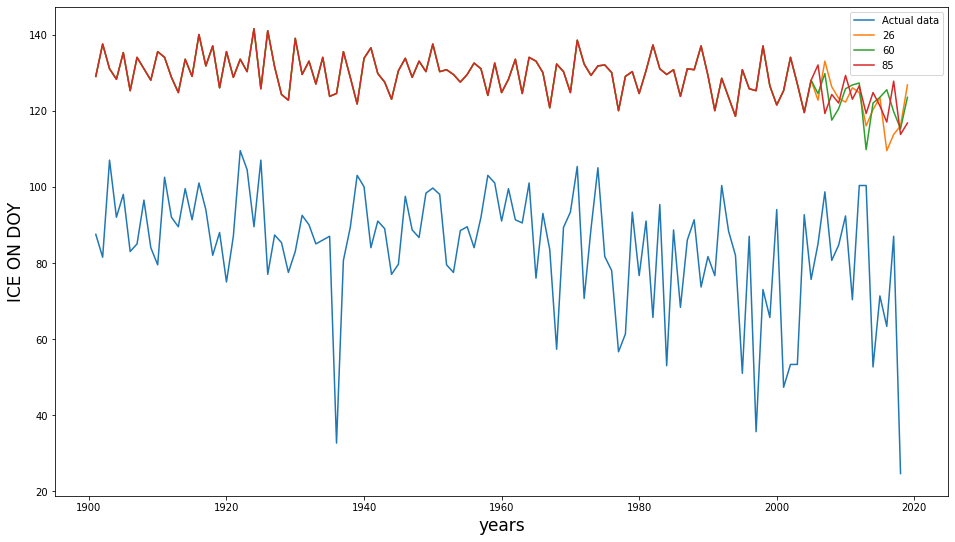

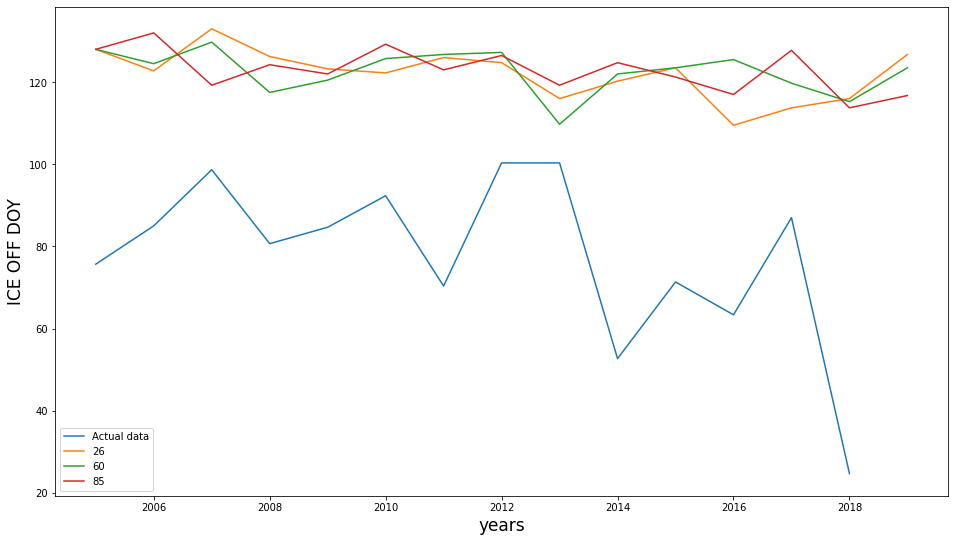

In [142]:
graph.figure(figsize=(16, 9))
graph.plot(mendota['years'], mendota['grouped_ice_off'], label='Actual data')

for rcp in mendota_simstrat_models['rcp'].unique():
    rcp_df = mendota_simstrat_models.loc[mendota_simstrat_models['rcp'] == rcp]
    graph.plot(rcp_df['years'], rcp_df['rcp_grouped_iceend'], label=rcp)

graph.legend()
graph.xlabel('years', fontsize=17)
graph.ylabel('ICE ON DOY', fontsize=17)

graph.show()

graph.figure(figsize=(16, 9))
graph.plot(mendota.loc[mendota['years'] > 2004]['years'], 
           mendota.loc[mendota['years'] > 2004]['grouped_ice_off'], label='Actual data')

for rcp in mendota_simstrat_models['rcp'].unique():
    rcp_df = mendota_simstrat_models.loc[(mendota_simstrat_models['rcp'] == rcp) & (mendota_simstrat_models['years'] > 2004)]
    graph.plot(rcp_df['years'], rcp_df['rcp_grouped_iceend'], label=rcp)

graph.legend()
graph.xlabel('years', fontsize=17)
graph.ylabel('ICE OFF DOY', fontsize=17)

graph.show()

# Top of World Maps

In [147]:
df['lake_model'] = df['model'].str.split('_').str.get(0)

In [151]:
df_after_2005 = df.loc[df['years'] > 2005]
df_after_2005

lat    lon  icestart   years  rcp              model      lat_long  \
6656     69.75  27.25      38.0  2006.0   26    albm_gfdl-esm2m   69.75_27.25   
6657     69.75  27.25      38.0  2006.0   60    albm_gfdl-esm2m   69.75_27.25   
6658     69.75  27.25      38.0  2006.0   85    albm_gfdl-esm2m   69.75_27.25   
6659     69.75  27.25      38.0  2006.0   26    albm_hadgem2-es   69.75_27.25   
6660     69.75  27.25      38.0  2006.0   60    albm_hadgem2-es   69.75_27.25   
...        ...    ...       ...     ...  ...                ...           ...   
1954143  42.25 -85.25      89.0  2018.0   60  lake_ipsl-cm5a-lr  42.25_-85.25   
1954144  42.25 -85.25     115.0  2018.0   85  lake_ipsl-cm5a-lr  42.25_-85.25   
1954145  42.25 -85.25     115.0  2018.0   85  lake_ipsl-cm5a-lr  42.25_-85.25   
1954146  42.25 -85.25      66.0  2018.0   60        lake_miroc5  42.25_-85.25   
1954147  42.25 -85.25      66.0  2018.0   60        lake_miroc5  42.25_-85.25   

         grouped_icestart  iceend  grouped_iceend  latitude  longitude  \
6656                -53.0   284.0           193.0     69.75      27.25   
6657                -53.0   277.0           186.0     69.75      27.25   
6658                -53.0   279.0           188.0     69.75      27.25   
6659                -53.0   283.0           192.0     69.75      27.25   
6660                -53.0   273.0           182.0     69.75      27.25   
...                   ...     ...             ...       ...        ...   
1954143              -2.0   170.0            79.0     42.25     -85.25   
1954144              24.0   181.0            90.0     42.25     -85.25   
1954145              24.0   181.0            90.0     42.25     -85.25   
1954146             -25.0   216.0           125.0     42.25     -85.25   
1954147             -25.0   216.0           125.0     42.25     -85.25   

         ice_on_doy  ice_off_doy  grouped_ice_on  grouped_ice_off  \
6656          -69.0        148.0           -69.0            148.0   
6657          -69.0        148.0           -69.0            148.0   
6658          -69.0        148.0           -69.0            148.0   
6659          -69.0        148.0           -69.0            148.0   
6660          -69.0        148.0           -69.0            148.0   
...             ...          ...             ...              ...   
1954143       -25.0          5.0            -5.5             44.5   
1954144        14.0         84.0            -5.5             44.5   
1954145       -25.0          5.0            -5.5             44.5   
1954146        14.0         84.0            -5.5             44.5   
1954147       -25.0          5.0            -5.5             44.5   

         diff_ice_on  diff_ice_off lake_model  
6656            16.0          45.0       albm  
6657            16.0          38.0       albm  
6658            16.0          40.0       albm  
6659            16.0          44.0       albm  
6660            16.0          34.0       albm  
...              ...           ...        ...  
1954143          3.5          34.5       lake  
1954144         29.5          45.5       lake  
1954145         29.5          45.5       lake  
1954146        -19.5          80.5       lake  
1954147        -19.5          80.5       lake  

[375160 rows x 19 columns]

In [171]:
subset_df_after_2005 = df_after_2005[['lat', 'lon', 'years', 'rcp', 'lake_model', 
                                      'grouped_icestart', 'grouped_ice_on', 'diff_ice_on', 
                                      'grouped_iceend', 'grouped_ice_off', 'diff_ice_off']]

subset_df_after_2005['diff_ice_on'] = subset_df_after_2005.groupby(['lat', 'lon', 'years', 'rcp', 
                                                                    'lake_model'])['diff_ice_on'].transform('mean')
subset_df_after_2005['diff_ice_off'] = subset_df_after_2005.groupby(['lat', 'lon', 'years', 'rcp', 
                                                                    'lake_model'])['diff_ice_off'].transform('mean')
subset_df_after_2005.drop_duplicates(inplace=True)

geo = ccrs.Geodetic()
transformed_locs = ortho.transform_points(geo, subset_df_after_2005['lon'].values, subset_df_after_2005['lat'].values)

subset_df_after_2005['transformed_lon'] = transformed_locs[:, 0]
subset_df_after_2005['transformed_lat'] = transformed_locs[:, 1]

display(subset_df_after_2005)

lat    lon   years  rcp lake_model  grouped_icestart  \
6656     69.75  27.25  2006.0   26       albm             -53.0   
6657     69.75  27.25  2006.0   60       albm             -53.0   
6658     69.75  27.25  2006.0   85       albm             -53.0   
6659     69.75  27.25  2006.0   26       albm             -53.0   
6660     69.75  27.25  2006.0   60       albm             -53.0   
...        ...    ...     ...  ...        ...               ...   
1954138  42.25 -85.25  2018.0   85       lake             -11.0   
1954140  42.25 -85.25  2018.0   26       lake             -18.0   
1954142  42.25 -85.25  2018.0   60       lake              -2.0   
1954144  42.25 -85.25  2018.0   85       lake              24.0   
1954146  42.25 -85.25  2018.0   60       lake             -25.0   

         grouped_ice_on  diff_ice_on  grouped_iceend  grouped_ice_off  \
6656              -69.0    16.500000           193.0            148.0   
6657              -69.0    16.500000           186.0            148.0   
6658              -69.0    16.500000           188.0            148.0   
6659              -69.0    16.500000           192.0            148.0   
6660              -69.0    16.500000           182.0            148.0   
...                 ...          ...             ...              ...   
1954138            -5.5    12.000000            40.0             44.5   
1954140            -5.5    -3.500000           119.0             44.5   
1954142            -5.5   -11.833333            79.0             44.5   
1954144            -5.5    12.000000            90.0             44.5   
1954146            -5.5   -11.833333           125.0             44.5   

         diff_ice_off  transformed_lon  transformed_lat  
6656        37.500000     1.010794e+06    -1.962578e+06  
6657        38.750000     1.010794e+06    -1.962578e+06  
6658        40.000000     1.010794e+06    -1.962578e+06  
6659        37.500000     1.010794e+06    -1.962578e+06  
6660        38.750000     1.010794e+06    -1.962578e+06  
...               ...              ...              ...  
1954138     20.500000    -4.704998e+06    -3.909552e+05  
1954140     59.500000    -4.704998e+06    -3.909552e+05  
1954142     60.833333    -4.704998e+06    -3.909552e+05  
1954144     20.500000    -4.704998e+06    -3.909552e+05  
1954146     60.833333    -4.704998e+06    -3.909552e+05  

[100880 rows x 13 columns]

In [172]:
subset_df_after_2005['lake_model'].unique()

array(['albm', 'clm45', 'lake', 'simstrat-uog'], dtype=object)

In [ ]:
fig
for model in 

graph.figure(figsize=(12, 12))
ortho = ccrs.Orthographic(central_longitude=0, central_latitude=90)
geo = ccrs.Geodetic()

# create the geoaxes for an orthographic projection
ax = graph.axes(projection=ortho)

# plot native orthographic points                                                                                
sns.scatterplot(points[:, 0], points[:, 1], hue=df_diff_ice_off['diff_ice_off'], palette='seismic', s=40)

# plot north pole for reference (with a projection transform)                                                                                           
ax.plot([0], [90], 'b^', transform=geo)
ax.coastlines(zorder=3)         

In [173]:
subset_df_after_2005.columns

Index(['lat', 'lon', 'years', 'rcp', 'lake_model', 'grouped_icestart',
       'grouped_ice_on', 'diff_ice_on', 'grouped_iceend', 'grouped_ice_off',
       'diff_ice_off', 'transformed_lon', 'transformed_lat'],
      dtype='object')

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/home/arshad/miniconda3/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:163: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


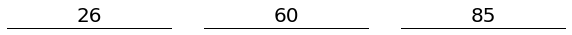

In [212]:
ortho = ccrs.Orthographic(central_longitude=0, central_latitude=90)
geo = ccrs.Geodetic()

fig, axs = graph.subplots(1, 3, subplot_kw={'projection': ortho},
                        figsize=(10, 5))

simstrat_ice_on = subset_df_after_2005.loc[(subset_df_after_2005['lake_model'] == 'simstrat-uog')]
simstrat_ice_on = simstrat_ice_on[['lake_model', 'rcp', 'transformed_lon', 'transformed_lat', 'diff_ice_on']]
simstrat_ice_on.drop_duplicates(inplace=True)

for rcp, subplot, in zip([26, 60, 85], axs):    
    rcp_simstrat = simstrat_ice_on.loc[simstrat_ice_on['rcp'] == rcp]
    
#     fig = graph.figure(figsize=(12, 8))

#     subplot = fig.add_subplot(1, 3, col, projection = ortho)
    subplot.set_title(rcp, fontsize=20)
    subplot.plot([0], [90], 'b^', transform=geo)
    subplot.coastlines(zorder=3)
    
    sns.scatterplot(rcp_simstrat['transformed_lon'], rcp_simstrat['transformed_lat'], 
                    hue = rcp_simstrat['diff_ice_on'], palette='seismic', s=40)
    
fig.tight_layout()    

In [207]:
axs

array([<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7fa49dc64a50>,
      dtype=object)

In [167]:
df_ice_on_slopes['diff'] = df_ice_on_slopes['slope_in_situ'] - df_ice_on_slopes['slope']

for temp_df in [df_ice_off_slopes, df_ice_on_slopes]:
    temp_df['lat'] = temp_df['lat_long'].str.split('_').str.get(0).astype(float)
    temp_df['long'] = temp_df['lat_long'].str.split('_').str.get(1).astype(float)
    temp_df.drop(columns=[col for col in temp_df.columns if 'len_' in col], inplace=True)
    temp_df['model'] = temp_df['lake_model'].str.split('_').str.get(0)
    
    geo = ccrs.Geodetic()
    transformed_locs = ortho.transform_points(geo, temp_df['long'].values, temp_df['lat'].values)

    temp_df['transformed_lon'] = transformed_locs[:, 0]
    temp_df['transformed_lat'] = transformed_locs[:, 1]

display(df_ice_off_slopes, df_ice_on_slopes)

lat_long variable         lake_model  rcp  slope_model  \
0      69.25_20.75  ice_off    albm_gfdl-esm2m   26    -0.756044   
1      69.25_20.75  ice_off    albm_gfdl-esm2m   60    -0.301099   
2      69.25_20.75  ice_off    albm_gfdl-esm2m   85    -0.202198   
3      69.25_20.75  ice_off    albm_hadgem2-es   26     0.626374   
4      69.25_20.75  ice_off    albm_hadgem2-es   60     0.063736   
...            ...      ...                ...  ...          ...   
6483  42.25_-85.25  ice_off  lake_ipsl-cm5a-lr   26    -0.507692   
6484  42.25_-85.25  ice_off  lake_ipsl-cm5a-lr   60    -0.246154   
6485  42.25_-85.25  ice_off  lake_ipsl-cm5a-lr   85    -0.364835   
6486  42.25_-85.25  ice_off        lake_miroc5   26    -2.412088   
6487  42.25_-85.25  ice_off        lake_miroc5   60     0.103297   

      slope_in_situ      diff    lat   long  transformed_lon  transformed_lat  \
0         -0.246154  0.509890  69.25  20.75     8.005974e+05    -2.113141e+06   
1         -0.246154  0.054945  69.25  20.75     8.005974e+05    -2.113141e+06   
2         -0.246154 -0.043956  69.25  20.75     8.005974e+05    -2.113141e+06   
3         -0.246154 -0.872527  69.25  20.75     8.005974e+05    -2.113141e+06   
4         -0.246154 -0.309890  69.25  20.75     8.005974e+05    -2.113141e+06   
...             ...       ...    ...    ...              ...              ...   
6483      -0.354945  0.152747  42.25 -85.25    -4.704998e+06    -3.909552e+05   
6484      -0.354945 -0.108791  42.25 -85.25    -4.704998e+06    -3.909552e+05   
6485      -0.354945  0.009890  42.25 -85.25    -4.704998e+06    -3.909552e+05   
6486      -0.354945  2.057143  42.25 -85.25    -4.704998e+06    -3.909552e+05   
6487      -0.354945 -0.458242  42.25 -85.25    -4.704998e+06    -3.909552e+05   

     model  
0     albm  
1     albm  
2     albm  
3     albm  
4     albm  
...    ...  
6483  lake  
6484  lake  
6485  lake  
6486  lake  
6487  lake  

[6488 rows x 12 columns]

lat_long variable         lake_model  rcp     slope  slope_in_situ  \
0      69.25_20.75   ice_on    albm_gfdl-esm2m   26  1.026374       0.628571   
1      69.25_20.75   ice_on    albm_gfdl-esm2m   60  0.375824       0.628571   
2      69.25_20.75   ice_on    albm_gfdl-esm2m   85  0.865934       0.628571   
3      69.25_20.75   ice_on    albm_hadgem2-es   26 -0.969231       0.628571   
4      69.25_20.75   ice_on    albm_hadgem2-es   60  0.184615       0.628571   
...            ...      ...                ...  ...       ...            ...   
4596  42.25_-85.25   ice_on  lake_ipsl-cm5a-lr   26  0.657143      -0.376923   
4597  42.25_-85.25   ice_on  lake_ipsl-cm5a-lr   60 -0.826374      -0.376923   
4598  42.25_-85.25   ice_on  lake_ipsl-cm5a-lr   85  0.672527      -0.376923   
4599  42.25_-85.25   ice_on        lake_miroc5   26  1.549451      -0.376923   
4600  42.25_-85.25   ice_on        lake_miroc5   60  0.254945      -0.376923   

        lat   long  transformed_lon  transformed_lat      diff model  
0     69.25  20.75     8.005974e+05    -2.113141e+06 -0.397802  albm  
1     69.25  20.75     8.005974e+05    -2.113141e+06  0.252747  albm  
2     69.25  20.75     8.005974e+05    -2.113141e+06 -0.237363  albm  
3     69.25  20.75     8.005974e+05    -2.113141e+06  1.597802  albm  
4     69.25  20.75     8.005974e+05    -2.113141e+06  0.443956  albm  
...     ...    ...              ...              ...       ...   ...  
4596  42.25 -85.25    -4.704998e+06    -3.909552e+05 -1.034066  lake  
4597  42.25 -85.25    -4.704998e+06    -3.909552e+05  0.449451  lake  
4598  42.25 -85.25    -4.704998e+06    -3.909552e+05 -1.049451  lake  
4599  42.25 -85.25    -4.704998e+06    -3.909552e+05 -1.926374  lake  
4600  42.25 -85.25    -4.704998e+06    -3.909552e+05 -0.631868  lake  

[4601 rows x 12 columns]

/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


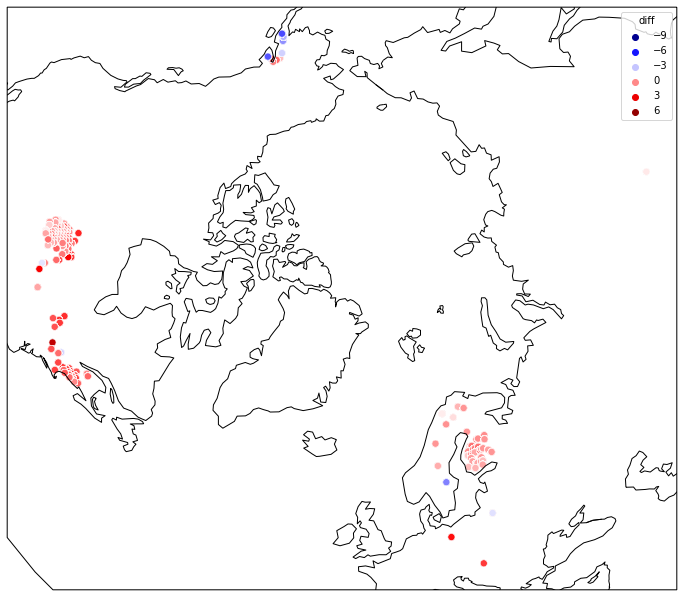

In [211]:
graph.figure(figsize=(12, 12))
ortho = ccrs.Orthographic(central_longitude=0, central_latitude=90)
geo = ccrs.Geodetic()

# create the geoaxes for an orthographic projection
ax = graph.axes(projection=ortho)
ax.coastlines(zorder=3)
sns.scatterplot(df_ice_off_slopes['transformed_lon'], df_ice_off_slopes['transformed_lat'], 
                hue = df_ice_off_slopes['diff'], palette='seismic', s=50)
graph.show()

# Looking at Ice On slopes extremes

In [8]:
ice_on_slopes = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/Analysis/ice_on_slopes_apr_26.csv')
obs_ice_on_slopes = ice_on_slopes[['lat_long', 'variable', 'len_in_situ_data', 'slope_in_situ']]
obs_ice_on_slopes.drop_duplicates(inplace=True)
obs_ice_on_slopes.sort_values(by='slope_in_situ', ascending=False, inplace=True)
print(len(obs_ice_on_slopes))
display(obs_ice_on_slopes.head())

104


lat_long variable  len_in_situ_data  slope_in_situ
2162  58.25_-155.75   ice_on                10       4.303030
2116  58.75_-155.75   ice_on                10       3.030303
2070  59.25_-155.25   ice_on                10       2.693939
2240    52.25_13.75   ice_on                11       2.133083
1794  60.75_-153.75   ice_on                10       2.027273

In [19]:
obs_in_situ = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sapna_work/Climate_change_lake_model_uncertainty/in_situ_grouped_observations.csv')
obs_in_situ.head()

years      lat_long  latitude  longitude  grouped_ice_on  grouped_ice_off
0  1959.0  74.75_101.25     74.75     101.25             NaN            166.0
1  1960.0  74.75_101.25     74.75     101.25           -89.0            182.0
2  1961.0  74.75_101.25     74.75     101.25           -87.0            187.0
3  1962.0  74.75_101.25     74.75     101.25           -88.0            188.0
4  1963.0  74.75_101.25     74.75     101.25           -94.0            190.0

In [23]:
orig_ice_on_slopes = []

for location in tqdm(obs_in_situ['lat_long'].unique()):
    temp_ice_on = obs_in_situ.loc[obs_in_situ['lat_long'] == location]
    temp_ice_on = temp_ice_on[['years', 'grouped_ice_on']]
    
    if len(temp_ice_on) < 10:
        continue

    x_cons = sm.add_constant(temp_ice_on['years'])
    model = sm.OLS(temp_ice_on['grouped_ice_on'], x_cons).fit()
    slope = model.params.values[1]
    orig_ice_on_slopes.append([location, len(temp_ice_on), 'ice_on', slope])

100%|██████████| 541/541 [00:05<00:00, 102.23it/s]


In [24]:
len(obs_in_situ['lat_long'].unique())

541

In [28]:
slopes_obs_ice_on = pd.DataFrame(orig_ice_on_slopes, columns = ['lat_long', 'len_data', 'variable', 'slope'])
slopes_obs_ice_on.dropna(inplace=True)
slopes_obs_ice_on.sort_values(by='slope', ascending=False, inplace=True)
slopes_obs_ice_on

lat_long  len_data variable     slope
121  60.25_-154.25        12   ice_on  2.020254
123  60.25_-150.25        13   ice_on  1.875296
25     67.75_33.25        10   ice_on  1.787879
194  51.75_-124.75        12   ice_on  1.503497
120    60.75_31.75        40   ice_on  1.220356
..             ...       ...      ...       ...
210   50.25_-86.75        11   ice_on -0.890909
94   61.25_-151.75        14   ice_on -1.241758
129  59.75_-155.25        12   ice_on -1.688542
93   61.25_-152.75        14   ice_on -1.975824
143  57.75_-156.25        10   ice_on -4.356631

[84 rows x 4 columns]

In [36]:
strong_slope = obs_in_situ.loc[obs_in_situ['lat_long'] == '60.25_-154.25']
strong_slope

years       lat_long  latitude  longitude  grouped_ice_on  \
8076  2001.0  60.25_-154.25     60.25    -154.25           -16.0   
8077  2003.0  60.25_-154.25     60.25    -154.25             7.0   
8078  2004.0  60.25_-154.25     60.25    -154.25            38.0   
8079  2005.0  60.25_-154.25     60.25    -154.25            21.0   
8080  2006.0  60.25_-154.25     60.25    -154.25            -5.0   
8081  2007.0  60.25_-154.25     60.25    -154.25             9.0   
8082  2008.0  60.25_-154.25     60.25    -154.25             0.0   
8083  2009.0  60.25_-154.25     60.25    -154.25            21.0   
8084  2010.0  60.25_-154.25     60.25    -154.25            -6.0   
8085  2011.0  60.25_-154.25     60.25    -154.25            -5.0   
8086  2013.0  60.25_-154.25     60.25    -154.25            46.0   
8087  2014.0  60.25_-154.25     60.25    -154.25            35.0   

      grouped_ice_off  
8076             18.0  
8077            110.0  
8078             68.0  
8079            120.0  
8080            111.0  
8081            131.0  
8082            124.0  
8083            122.0  
8084            126.0  
8085            117.0  
8086            107.0  
8087             47.0

In [37]:
x_cons = sm.add_constant(strong_slope['years'])
model = sm.OLS(strong_slope['grouped_ice_on'], x_cons).fit()
model.summary()

/home/arshad/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         grouped_ice_on   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     1.970
Date:                Wed, 19 May 2021   Prob (F-statistic):              0.191
Time:                        11:05:04   Log-Likelihood:                -51.357
No. Observations:                  12   AIC:                             106.7
Df Residuals:                      10   BIC:                             107.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4043.7456   2889.467     -1.399      0.192   -1.05e+04    2394.388
years          2.0203      1.439      1.404      0.191      -1.187       5.227
==============================================================================
Omnibus:                        0.707   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.702   Jarque-Bera (JB):                0.651
Skew:                           0.292   Prob(JB):                        0.722
Kurtosis:                       2.020   Cond. No.                     1.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
model.params

const   -4043.745643
years       2.020254
dtype: float64

/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


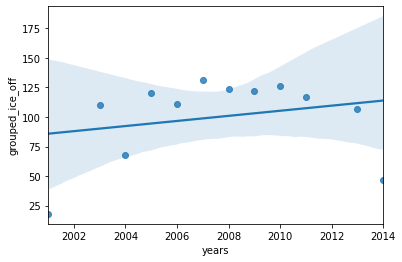

In [39]:
sns.regplot(strong_slope['years'], strong_slope['grouped_ice_off'])